In [1]:
import numpy as np 
import pandas as pd 
import urllib.request
from urllib.request import urlretrieve, Request, urlopen
import json
import time
import os
import fnmatch
import re
from bs4 import BeautifulSoup
import requests
import csv

We plan to scrape all roses from the rose database available at garden.org

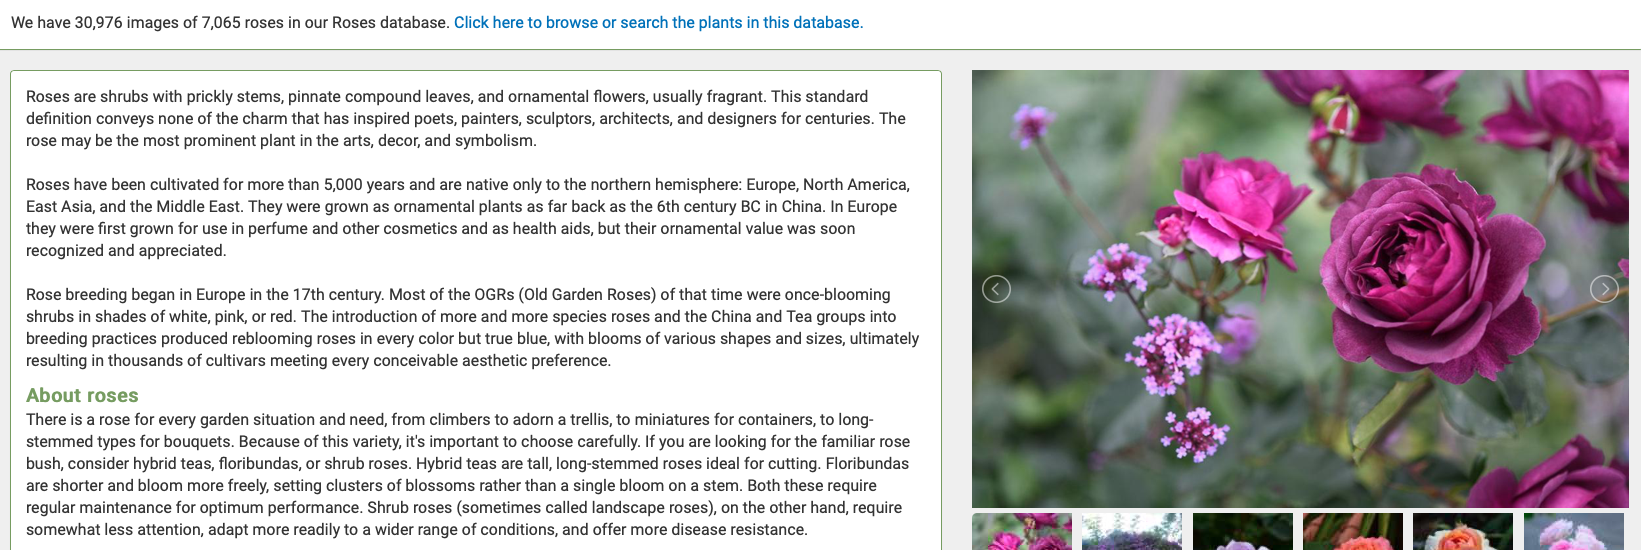


URL structure:
    
    First page  - https://garden.org/plants/browse/plants/children/181506/?offset=0
    Second page - https://garden.org/plants/browse/plants/children/181506/?offset=20
    Third page  - https://garden.org/plants/browse/plants/children/181506/?offset=40
    
    
Looks like navigation to the next page can be achived by changing parameter offset by increasing by 20 each time. 

In [11]:
list_of_pages_to_scrape = []
for i in range(0,354):
    add = i*20
    url = "https://garden.org/plants/browse/plants/children/181506/?offset=0" + str(add)
    print(url)
    list_of_pages_to_scrape.append(url)

https://garden.org/plants/browse/plants/children/181506/?offset=00
https://garden.org/plants/browse/plants/children/181506/?offset=020
https://garden.org/plants/browse/plants/children/181506/?offset=040
https://garden.org/plants/browse/plants/children/181506/?offset=060
https://garden.org/plants/browse/plants/children/181506/?offset=080
https://garden.org/plants/browse/plants/children/181506/?offset=0100
https://garden.org/plants/browse/plants/children/181506/?offset=0120
https://garden.org/plants/browse/plants/children/181506/?offset=0140
https://garden.org/plants/browse/plants/children/181506/?offset=0160
https://garden.org/plants/browse/plants/children/181506/?offset=0180
https://garden.org/plants/browse/plants/children/181506/?offset=0200
https://garden.org/plants/browse/plants/children/181506/?offset=0220
https://garden.org/plants/browse/plants/children/181506/?offset=0240
https://garden.org/plants/browse/plants/children/181506/?offset=0260
https://garden.org/plants/browse/plants/

Below I comented out test scripts that I made befoe I created proper loops. 

In [ ]:
# specify which URL/web page we are going to be scraping
# url = "https://garden.org/plants/browse/plants/children/181506/?offset=0"

# open the url and put the HTML into the page variable
# req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
# webpage = urlopen(req).read()

# parse the HTML from our URL into the BeautifulSoup parse tree format
# soup = BeautifulSoup(webpage, "lxml")

#for i in soup.select("td"):
    #print(i.find('a').get('href'))
    #print(i)

In [24]:
list_of_rose_url = []

for u in list_of_pages_to_scrape:
    time.sleep(1)
    req = Request(u, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()

    soup = BeautifulSoup(webpage, "lxml")
    for i in soup.select("td"):
        print(i.find('a').get('href'))
        rose_url = i.find('a').get('href')
        list_of_rose_url.append(rose_url)    

/plants/view/181506/Roses-Rosa/
/plants/view/181506/Roses-Rosa/
/plants/view/632011/Rose-Rosa-abietina/
/plants/view/632011/Rose-Rosa-abietina/
/plants/view/632012/Rose-Rosa-abrica/
/plants/view/632012/Rose-Rosa-abrica/
/plants/view/632013/Rose-Rosa-abutalybovii/
/plants/view/632013/Rose-Rosa-abutalybovii/
/plants/view/632014/Rose-Rosa-abyssinica/
/plants/view/632014/Rose-Rosa-abyssinica/
/plants/view/478177/Rose-Rosa-acicularis/
/plants/view/478177/Rose-Rosa-acicularis/
/plants/view/632015/Rose-Rosa-acicularis-subsp-acicularis/
/plants/view/632015/Rose-Rosa-acicularis-subsp-acicularis/
/plants/view/478292/Says-Prickly-Rose-Rosa-acicularis-subsp-sayi/
/plants/view/478292/Says-Prickly-Rose-Rosa-acicularis-subsp-sayi/
/plants/view/632016/Rose-Rosa-adenophylla/
/plants/view/632016/Rose-Rosa-adenophylla/
/plants/view/478464/Rose-Rosa-agrestis/
/plants/view/478464/Rose-Rosa-agrestis/
/plants/view/632018/Rose-Rosa-alabukensis/
/plants/view/632018/Rose-Rosa-alabukensis/
/plants/view/479189/Ro

/plants/view/640956/Rose-Rosa-donetzica/
/plants/view/640956/Rose-Rosa-donetzica/
/plants/view/640957/Rose-Rosa-dsharkenti/
/plants/view/640957/Rose-Rosa-dsharkenti/
/plants/view/640958/Rose-Rosa-dubovikiae/
/plants/view/640958/Rose-Rosa-dubovikiae/
/plants/view/640959/Rose-Rosa-dulcissima/
/plants/view/640959/Rose-Rosa-dulcissima/
/plants/view/478757/Rose-Rosa-dumalis/
/plants/view/478757/Rose-Rosa-dumalis/
/plants/view/479211/Rose-Rosa-duplicata/
/plants/view/479211/Rose-Rosa-duplicata/
/plants/view/478758/Rose-Rosa-ecae/
/plants/view/478758/Rose-Rosa-ecae/
/plants/view/640960/Rose-Rosa-elymaitica/
/plants/view/640960/Rose-Rosa-elymaitica/
/plants/view/640961/Rose-Rosa-ermanica/
/plants/view/640961/Rose-Rosa-ermanica/
/plants/view/495091/Rose-Rosa-fargesiana/
/plants/view/495091/Rose-Rosa-fargesiana/
/plants/view/479237/Rose-Rosa-farreri/
/plants/view/479237/Rose-Rosa-farreri/
/plants/view/478759/Rose-Rosa-fedtschenkoana/
/plants/view/478759/Rose-Rosa-fedtschenkoana/
/plants/view/640

/plants/view/479180/Rose-Rosa-mairei/
/plants/view/479180/Rose-Rosa-mairei/
/plants/view/478467/Rose-Rosa-majalis/
/plants/view/478467/Rose-Rosa-majalis/
/plants/view/641112/Rose-Rosa-majorugosa/
/plants/view/641112/Rose-Rosa-majorugosa/
/plants/view/641113/Rose-Rosa-makinoana/
/plants/view/641113/Rose-Rosa-makinoana/
/plants/view/641114/Rose-Rosa-mandenovii/
/plants/view/641114/Rose-Rosa-mandenovii/
/plants/view/641115/Rose-Rosa-manshurica/
/plants/view/641115/Rose-Rosa-manshurica/
/plants/view/641116/Rose-Rosa-manshurica-var-glabriuscula/
/plants/view/641116/Rose-Rosa-manshurica-var-glabriuscula/
/plants/view/641117/Rose-Rosa-marginata/
/plants/view/641117/Rose-Rosa-marginata/
/plants/view/478770/Rose-Rosa-marschalliana/
/plants/view/478770/Rose-Rosa-marschalliana/
/plants/view/478771/Rose-Rosa-maximowicziana/
/plants/view/478771/Rose-Rosa-maximowicziana/
/plants/view/641118/Rose-Rosa-maximowicziana-var-coreana/
/plants/view/641118/Rose-Rosa-maximowicziana-var-coreana/
/plants/view/6

/plants/view/641179/Rose-Rosa-rhaetica/
/plants/view/641179/Rose-Rosa-rhaetica/
/plants/view/641180/Rose-Rosa-richardii/
/plants/view/641180/Rose-Rosa-richardii/
/plants/view/641181/Rose-Rosa-roopae/
/plants/view/641181/Rose-Rosa-roopae/
/plants/view/478577/Chestnut-Rose-Rosa-roxburghii/
/plants/view/478577/Chestnut-Rose-Rosa-roxburghii/
/plants/view/232017/Rose-Rosa-rubiginosa/
/plants/view/232017/Rose-Rosa-rubiginosa/
/plants/view/479196/Rose-Rosa-rubus/
/plants/view/479196/Rose-Rosa-rubus/
/plants/view/180948/Rose-Rosa-rugosa/
/plants/view/180948/Rose-Rosa-rugosa/
/plants/view/641184/Rose-Rosa-russanovii/
/plants/view/641184/Rose-Rosa-russanovii/
/plants/view/641185/Rose-Rosa-salaevensis/
/plants/view/641185/Rose-Rosa-salaevensis/
/plants/view/641186/Rose-Rosa-sambucina/
/plants/view/641186/Rose-Rosa-sambucina/
/plants/view/479212/Rose-Rosa-saturata/
/plants/view/479212/Rose-Rosa-saturata/
/plants/view/641187/Rose-Rosa-saturata-var-glandulosa/
/plants/view/641187/Rose-Rosa-saturata-

/plants/view/438/Rose-Rosa-A-Shropshire-Lad/
/plants/view/438/Rose-Rosa-A-Shropshire-Lad/
/plants/view/771740/Rose-Rosa-A-Whiter-Shade-of-Pale/
/plants/view/771740/Rose-Rosa-A-Whiter-Shade-of-Pale/
/plants/view/966/Rose-Rosa-A-R-S-Centennial/
/plants/view/966/Rose-Rosa-A-R-S-Centennial/
/plants/view/1504/Rose-Rosa-Aafje-Heynis/
/plants/view/1504/Rose-Rosa-Aafje-Heynis/
/plants/view/1505/Rose-Rosa-Aalsmeer-Gold/
/plants/view/1505/Rose-Rosa-Aalsmeer-Gold/
/plants/view/1506/Rose-Rosa-Abaillard/
/plants/view/1506/Rose-Rosa-Abaillard/
/plants/view/1507/Rose-Rosa-Abasanta/
/plants/view/1507/Rose-Rosa-Abasanta/
/plants/view/1508/Rose-Rosa-Abba-Dabba/
/plants/view/1508/Rose-Rosa-Abba-Dabba/
/plants/view/1677/Rose-Rosa-Abbaye-de-Cluny/
/plants/view/1677/Rose-Rosa-Abbaye-de-Cluny/
/plants/view/210/Rose-Rosa-Abbe-Girardin/
/plants/view/210/Rose-Rosa-Abbe-Girardin/
/plants/view/1509/Rose-Rosa-Abbeyfield-Rose/
/plants/view/1509/Rose-Rosa-Abbeyfield-Rose/
/plants/view/695651/Rose-Rosa-Abdul-Hamid/
/

/plants/view/703172/Rose-Rosa-Albert-Georg-Pluta-Rose/
/plants/view/703172/Rose-Rosa-Albert-Georg-Pluta-Rose/
/plants/view/1097/Rose-Rosa-Alberta/
/plants/view/1097/Rose-Rosa-Alberta/
/plants/view/1726/Rose-Rosa-Albertine/
/plants/view/1726/Rose-Rosa-Albertine/
/plants/view/4291/Rose-Rosa-Albuquerque-Enchantment/
/plants/view/4291/Rose-Rosa-Albuquerque-Enchantment/
/plants/view/1051/Rose-Rosa-Alchymist/
/plants/view/1051/Rose-Rosa-Alchymist/
/plants/view/777/Rose-Rosa-Alcime/
/plants/view/777/Rose-Rosa-Alcime/
/plants/view/699133/Rose-Rosa-Alden-Biesen/
/plants/view/699133/Rose-Rosa-Alden-Biesen/
/plants/view/734106/Rose-Rosa-Alea/
/plants/view/734106/Rose-Rosa-Alea/
/plants/view/2591/Rose-Rosa-Alec-Rose/
/plants/view/2591/Rose-Rosa-Alec-Rose/
/plants/view/1705/Rose-Rosa-Alecs-Red/
/plants/view/1705/Rose-Rosa-Alecs-Red/
/plants/view/658439/Rose-Rosa-Alessa/
/plants/view/658439/Rose-Rosa-Alessa/
/plants/view/1052/Rose-Rosa-Alexander/
/plants/view/1052/Rose-Rosa-Alexander/
/plants/view/3

/plants/view/953/Rose-Rosa-Amber-Sun/
/plants/view/953/Rose-Rosa-Amber-Sun/
/plants/view/527989/Rose-Rosa-Amber-Sunblaze/
/plants/view/527989/Rose-Rosa-Amber-Sunblaze/
/plants/view/1105/Rose-Rosa-Amber-Waves/
/plants/view/1105/Rose-Rosa-Amber-Waves/
/plants/view/31/Rose-Rosa-Amberlight/
/plants/view/31/Rose-Rosa-Amberlight/
/plants/view/712/Rose-Rosa-Ambiance/
/plants/view/712/Rose-Rosa-Ambiance/
/plants/view/537192/Rose-Rosa-Ambiance/
/plants/view/537192/Rose-Rosa-Ambiance/
/plants/view/646715/Rose-Rosa-Ambiente/
/plants/view/646715/Rose-Rosa-Ambiente/
/plants/view/703262/Rose-Rosa-Ambra/
/plants/view/703262/Rose-Rosa-Ambra/
/plants/view/441/Rose-Rosa-Ambridge-Rose/
/plants/view/441/Rose-Rosa-Ambridge-Rose/
/plants/view/593/Rose-Rosa-Ambroise-Pare/
/plants/view/593/Rose-Rosa-Ambroise-Pare/
/plants/view/184/Rose-Rosa-Amelia/
/plants/view/184/Rose-Rosa-Amelia/
/plants/view/673397/Rose-Rosa-Amelia/
/plants/view/673397/Rose-Rosa-Amelia/
/plants/view/736620/Rose-Rosa-Amelia-Dee/
/plants/vi

/plants/view/1117/Rose-Rosa-Anne-Cocker/
/plants/view/1117/Rose-Rosa-Anne-Cocker/
/plants/view/695737/Rose-Rosa-Anne-de-Bretagne/
/plants/view/695737/Rose-Rosa-Anne-de-Bretagne/
/plants/view/1118/Rose-Rosa-Anne-Harkness/
/plants/view/1118/Rose-Rosa-Anne-Harkness/
/plants/view/1461/Rose-Rosa-Anne-Hathaway/
/plants/view/1461/Rose-Rosa-Anne-Hathaway/
/plants/view/2115/Rose-Rosa-Anne-Letts/
/plants/view/2115/Rose-Rosa-Anne-Letts/
/plants/view/771902/Rose-Rosa-Anne-Lorentz/
/plants/view/771902/Rose-Rosa-Anne-Lorentz/
/plants/view/866/Rose-Rosa-Anne-Marie-Cote/
/plants/view/866/Rose-Rosa-Anne-Marie-Cote/
/plants/view/2602/Rose-Rosa-Anne-Marie-Trechslin/
/plants/view/2602/Rose-Rosa-Anne-Marie-Trechslin/
/plants/view/3948/Rose-Rosa-Anne-Morrow-Lindbergh/
/plants/view/3948/Rose-Rosa-Anne-Morrow-Lindbergh/
/plants/view/695748/Rose-Rosa-Anne-of-Geierstein/
/plants/view/695748/Rose-Rosa-Anne-of-Geierstein/
/plants/view/709375/Rose-Rosa-Anne-Vanderlove/
/plants/view/709375/Rose-Rosa-Anne-Vanderlove

/plants/view/695755/Rose-Rosa-Argental/
/plants/view/695755/Rose-Rosa-Argental/
/plants/view/2121/Rose-Rosa-Arianna/
/plants/view/2121/Rose-Rosa-Arianna/
/plants/view/695754/Rose-Rosa-Arielle-Dombasle/
/plants/view/695754/Rose-Rosa-Arielle-Dombasle/
/plants/view/1129/Rose-Rosa-Arifa/
/plants/view/1129/Rose-Rosa-Arifa/
/plants/view/4539/Rose-Rosa-Arioso/
/plants/view/4539/Rose-Rosa-Arioso/
/plants/view/695753/Rose-Rosa-Aristide-Briand/
/plants/view/695753/Rose-Rosa-Aristide-Briand/
/plants/view/695751/Rose-Rosa-Aristide-Dupuy/
/plants/view/695751/Rose-Rosa-Aristide-Dupuy/
/plants/view/3130/Rose-Rosa-Arizona/
/plants/view/3130/Rose-Rosa-Arizona/
/plants/view/695760/Rose-Rosa-Arlequin/
/plants/view/695760/Rose-Rosa-Arlequin/
/plants/view/3340/Rose-Rosa-Armada/
/plants/view/3340/Rose-Rosa-Armada/
/plants/view/186/Rose-Rosa-Armide/
/plants/view/186/Rose-Rosa-Armide/
/plants/view/2608/Rose-Rosa-Arnoldiana/
/plants/view/2608/Rose-Rosa-Arnoldiana/
/plants/view/703642/Rose-Rosa-AROfres/
/plants

/plants/view/647021/Rose-Rosa-Ave-Maria/
/plants/view/647021/Rose-Rosa-Ave-Maria/
/plants/view/673092/Rose-Rosa-Avenir/
/plants/view/673092/Rose-Rosa-Avenir/
/plants/view/695793/Rose-Rosa-Aveu/
/plants/view/695793/Rose-Rosa-Aveu/
/plants/view/695792/Rose-Rosa-Aveyronensis/
/plants/view/695792/Rose-Rosa-Aveyronensis/
/plants/view/150/Rose-Rosa-Aviateur-Bleriot/
/plants/view/150/Rose-Rosa-Aviateur-Bleriot/
/plants/view/1139/Rose-Rosa-Avignon/
/plants/view/1139/Rose-Rosa-Avignon/
/plants/view/675712/Rose-Rosa-Avo-Alfredo/
/plants/view/675712/Rose-Rosa-Avo-Alfredo/
/plants/view/695791/Rose-Rosa-Avocat-Duvivier/
/plants/view/695791/Rose-Rosa-Avocat-Duvivier/
/plants/view/1140/Rose-Rosa-Avocet/
/plants/view/1140/Rose-Rosa-Avocet/
/plants/view/2618/Rose-Rosa-Avon/
/plants/view/2618/Rose-Rosa-Avon/
/plants/view/1518/Rose-Rosa-Awakening/
/plants/view/1518/Rose-Rosa-Awakening/
/plants/view/233240/Rose-Rosa-Awareness/
/plants/view/233240/Rose-Rosa-Awareness/
/plants/view/775147/Rose-Rosa-Aydan-Re

/plants/view/695777/Rose-Rosa-Barricade/
/plants/view/695777/Rose-Rosa-Barricade/
/plants/view/792787/Rose-Rosa-Basic-Cover/
/plants/view/792787/Rose-Rosa-Basic-Cover/
/plants/view/2629/Rose-Rosa-Basildon-Bond/
/plants/view/2629/Rose-Rosa-Basildon-Bond/
/plants/view/1063/Rose-Rosa-Bassino/
/plants/view/1063/Rose-Rosa-Bassino/
/plants/view/772212/Rose-Rosa-Bassoues-Tea/
/plants/view/772212/Rose-Rosa-Bassoues-Tea/
/plants/view/1745/Rose-Rosa-Basyes-Blueberry/
/plants/view/1745/Rose-Rosa-Basyes-Blueberry/
/plants/view/695776/Rose-Rosa-Basyes-Myrrh-Scented-Rose/
/plants/view/695776/Rose-Rosa-Basyes-Myrrh-Scented-Rose/
/plants/view/108/Rose-Rosa-Basyes-Purple-Rose/
/plants/view/108/Rose-Rosa-Basyes-Purple-Rose/
/plants/view/312/Rose-Rosa-Batavia-Rose/
/plants/view/312/Rose-Rosa-Batavia-Rose/
/plants/view/716183/Rose-Rosa-Bathsheba/
/plants/view/716183/Rose-Rosa-Bathsheba/
/plants/view/703170/Rose-Rosa-Baxter-Beauty/
/plants/view/703170/Rose-Rosa-Baxter-Beauty/
/plants/view/703188/Rose-Rosa-

/plants/view/2136/Rose-Rosa-Berlin/
/plants/view/2136/Rose-Rosa-Berlin/
/plants/view/553785/Rose-Rosa-Bermudas-Kathleen/
/plants/view/553785/Rose-Rosa-Bermudas-Kathleen/
/plants/view/775172/Rose-Rosa-Berna/
/plants/view/775172/Rose-Rosa-Berna/
/plants/view/672977/Rose-Rosa-Bernadette-Chirac/
/plants/view/672977/Rose-Rosa-Bernadette-Chirac/
/plants/view/698381/Rose-Rosa-Bernadette-Lafont/
/plants/view/698381/Rose-Rosa-Bernadette-Lafont/
/plants/view/698380/Rose-Rosa-Bernard/
/plants/view/698380/Rose-Rosa-Bernard/
/plants/view/698379/Rose-Rosa-Bernard-Hinault/
/plants/view/698379/Rose-Rosa-Bernard-Hinault/
/plants/view/703187/Rose-Rosa-Bernd-Weigel-Rose/
/plants/view/703187/Rose-Rosa-Bernd-Weigel-Rose/
/plants/view/1153/Rose-Rosa-Bernina/
/plants/view/1153/Rose-Rosa-Bernina/
/plants/view/1068/Rose-Rosa-Bernstein-Rose/
/plants/view/1068/Rose-Rosa-Bernstein-Rose/
/plants/view/2442/Rose-Rosa-Berries-n-Cream/
/plants/view/2442/Rose-Rosa-Berries-n-Cream/
/plants/view/698378/Rose-Rosa-Bertrand

/plants/view/3596/Rose-Rosa-Bliss/
/plants/view/3596/Rose-Rosa-Bliss/
/plants/view/764085/Rose-Rosa-Bloody-Mary/
/plants/view/764085/Rose-Rosa-Bloody-Mary/
/plants/view/589153/Rose-Rosa-Bloom-of-Ruth/
/plants/view/589153/Rose-Rosa-Bloom-of-Ruth/
/plants/view/719/Rose-Rosa-Bloomfield-Abundance/
/plants/view/719/Rose-Rosa-Bloomfield-Abundance/
/plants/view/717/Rose-Rosa-Bloomfield-Comet/
/plants/view/717/Rose-Rosa-Bloomfield-Comet/
/plants/view/2639/Rose-Rosa-Bloomfield-Courage/
/plants/view/2639/Rose-Rosa-Bloomfield-Courage/
/plants/view/718/Rose-Rosa-Bloomfield-Dainty/
/plants/view/718/Rose-Rosa-Bloomfield-Dainty/
/plants/view/2640/Rose-Rosa-Bloomin-Easy/
/plants/view/2640/Rose-Rosa-Bloomin-Easy/
/plants/view/1749/Rose-Rosa-Blossomtime/
/plants/view/1749/Rose-Rosa-Blossomtime/
/plants/view/1161/Rose-Rosa-Blue-Bajou/
/plants/view/1161/Rose-Rosa-Blue-Bajou/
/plants/view/2142/Rose-Rosa-Blue-Boy-2001/
/plants/view/2142/Rose-Rosa-Blue-Boy-2001/
/plants/view/1162/Rose-Rosa-Blue-Chip/
/plants

/plants/view/1719/Rose-Rosa-Brandy/
/plants/view/1719/Rose-Rosa-Brandy/
/plants/view/2150/Rose-Rosa-Brasilia/
/plants/view/2150/Rose-Rosa-Brasilia/
/plants/view/8/Rose-Rosa-Brass-Band/
/plants/view/8/Rose-Rosa-Brass-Band/
/plants/view/544528/Rose-Rosa-Brass-Ring/
/plants/view/544528/Rose-Rosa-Brass-Ring/
/plants/view/733871/Rose-Rosa-Brautzauber/
/plants/view/733871/Rose-Rosa-Brautzauber/
/plants/view/1168/Rose-Rosa-Brave-Heart/
/plants/view/1168/Rose-Rosa-Brave-Heart/
/plants/view/3268/Rose-Rosa-Brave-Patriot/
/plants/view/3268/Rose-Rosa-Brave-Patriot/
/plants/view/186018/Rose-Rosa-Braveheart/
/plants/view/186018/Rose-Rosa-Braveheart/
/plants/view/3958/Rose-Rosa-Break-o-Day/
/plants/view/3958/Rose-Rosa-Break-o-Day/
/plants/view/3450/Rose-Rosa-Breath-of-Life/
/plants/view/3450/Rose-Rosa-Breath-of-Life/
/plants/view/3493/Rose-Rosa-Breathtaking/
/plants/view/3493/Rose-Rosa-Breathtaking/
/plants/view/447/Rose-Rosa-Bredon/
/plants/view/447/Rose-Rosa-Bredon/
/plants/view/3735/Rose-Rosa-Bree

/plants/view/528621/Rose-Rosa-Cajun-Moon/
/plants/view/528621/Rose-Rosa-Cajun-Moon/
/plants/view/3121/Rose-Rosa-Cajun-Spice/
/plants/view/3121/Rose-Rosa-Cajun-Spice/
/plants/view/528622/Rose-Rosa-Cajun-Sunrise/
/plants/view/528622/Rose-Rosa-Cajun-Sunrise/
/plants/view/1527/Rose-Rosa-Cal-Poly/
/plants/view/1527/Rose-Rosa-Cal-Poly/
/plants/view/1044/Rose-Rosa-Cal-Poly-Cl/
/plants/view/1044/Rose-Rosa-Cal-Poly-Cl/
/plants/view/706091/Rose-Rosa-Calapuno/
/plants/view/706091/Rose-Rosa-Calapuno/
/plants/view/681/Rose-Rosa-Calibra/
/plants/view/681/Rose-Rosa-Calibra/
/plants/view/3951/Rose-Rosa-Calico/
/plants/view/3951/Rose-Rosa-Calico/
/plants/view/4472/Rose-Rosa-Calico-Gal/
/plants/view/4472/Rose-Rosa-Calico-Gal/
/plants/view/696259/Rose-Rosa-Caliente/
/plants/view/696259/Rose-Rosa-Caliente/
/plants/view/3963/Rose-Rosa-California/
/plants/view/3963/Rose-Rosa-California/
/plants/view/1855/Rose-Rosa-California-Centennial/
/plants/view/1855/Rose-Rosa-California-Centennial/
/plants/view/3964/Ro

/plants/view/610388/Rose-Rosa-Cariad/
/plants/view/610388/Rose-Rosa-Cariad/
/plants/view/3968/Rose-Rosa-Caribbean/
/plants/view/3968/Rose-Rosa-Caribbean/
/plants/view/677894/Rose-Rosa-Caribbean-Breeze/
/plants/view/677894/Rose-Rosa-Caribbean-Breeze/
/plants/view/673085/Rose-Rosa-Carina/
/plants/view/673085/Rose-Rosa-Carina/
/plants/view/3513/Rose-Rosa-Caring-for-You/
/plants/view/3513/Rose-Rosa-Caring-for-You/
/plants/view/771157/Rose-Rosa-Caritas/
/plants/view/771157/Rose-Rosa-Caritas/
/plants/view/2155/Rose-Rosa-Carla/
/plants/view/2155/Rose-Rosa-Carla/
/plants/view/703231/Rose-Rosa-Carmel-Naughton/
/plants/view/703231/Rose-Rosa-Carmel-Naughton/
/plants/view/3406/Rose-Rosa-Carmel-Sunset/
/plants/view/3406/Rose-Rosa-Carmel-Sunset/
/plants/view/3784/Rose-Rosa-Carmen/
/plants/view/3784/Rose-Rosa-Carmen/
/plants/view/672979/Rose-Rosa-Carmen/
/plants/view/672979/Rose-Rosa-Carmen/
/plants/view/3824/Rose-Rosa-Carmenetta/
/plants/view/3824/Rose-Rosa-Carmenetta/
/plants/view/4004/Rose-Rosa-Ca

/plants/view/3970/Rose-Rosa-Chantilly-Lace/
/plants/view/3970/Rose-Rosa-Chantilly-Lace/
/plants/view/2161/Rose-Rosa-Chaplins-Pink-Climber/
/plants/view/2161/Rose-Rosa-Chaplins-Pink-Climber/
/plants/view/1193/Rose-Rosa-Charisma/
/plants/view/1193/Rose-Rosa-Charisma/
/plants/view/574/Rose-Rosa-Charity/
/plants/view/574/Rose-Rosa-Charity/
/plants/view/4060/Rose-Rosa-Charivari/
/plants/view/4060/Rose-Rosa-Charivari/
/plants/view/2998/Rose-Rosa-Charles-Albanel/
/plants/view/2998/Rose-Rosa-Charles-Albanel/
/plants/view/450/Rose-Rosa-Charles-Austin/
/plants/view/450/Rose-Rosa-Charles-Austin/
/plants/view/3910/Rose-Rosa-Charles-Aznavour/
/plants/view/3910/Rose-Rosa-Charles-Aznavour/
/plants/view/451/Rose-Rosa-Charles-Darwin/
/plants/view/451/Rose-Rosa-Charles-Darwin/
/plants/view/2790/Rose-Rosa-Charles-de-Gaulle/
/plants/view/2790/Rose-Rosa-Charles-de-Gaulle/
/plants/view/608/Rose-Rosa-Charles-de-Mills/
/plants/view/608/Rose-Rosa-Charles-de-Mills/
/plants/view/1194/Rose-Rosa-Charles-Dickens/
/

/plants/view/229830/Rose-Rosa-Christine/
/plants/view/229830/Rose-Rosa-Christine/
/plants/view/675758/Rose-Rosa-Christine-Gandy/
/plants/view/675758/Rose-Rosa-Christine-Gandy/
/plants/view/1206/Rose-Rosa-Christingle/
/plants/view/1206/Rose-Rosa-Christingle/
/plants/view/3551/Rose-Rosa-Christopher-Columbus/
/plants/view/3551/Rose-Rosa-Christopher-Columbus/
/plants/view/9/Rose-Rosa-Christopher-Marlowe/
/plants/view/9/Rose-Rosa-Christopher-Marlowe/
/plants/view/3738/Rose-Rosa-Christopher-Stone/
/plants/view/3738/Rose-Rosa-Christopher-Stone/
/plants/view/881/Rose-Rosa-Chromatella/
/plants/view/881/Rose-Rosa-Chromatella/
/plants/view/1534/Rose-Rosa-Chrysler-Imperial/
/plants/view/1534/Rose-Rosa-Chrysler-Imperial/
/plants/view/1207/Rose-Rosa-Chuckles/
/plants/view/1207/Rose-Rosa-Chuckles/
/plants/view/4433/Rose-Rosa-Church-Mouse/
/plants/view/4433/Rose-Rosa-Church-Mouse/
/plants/view/779018/Rose-Rosa-Cibles/
/plants/view/779018/Rose-Rosa-Cibles/
/plants/view/2993/Rose-Rosa-Cicely-Lascelles/


/plants/view/2180/Rose-Rosa-Colibri/
/plants/view/2180/Rose-Rosa-Colibri/
/plants/view/2448/Rose-Rosa-Cologne/
/plants/view/2448/Rose-Rosa-Cologne/
/plants/view/4333/Rose-Rosa-Colomas-Gold/
/plants/view/4333/Rose-Rosa-Colomas-Gold/
/plants/view/2452/Rose-Rosa-Color-Magic/
/plants/view/2452/Rose-Rosa-Color-Magic/
/plants/view/3356/Rose-Rosa-Color-Me-Pink/
/plants/view/3356/Rose-Rosa-Color-Me-Pink/
/plants/view/4459/Rose-Rosa-Colorific/
/plants/view/4459/Rose-Rosa-Colorific/
/plants/view/3976/Rose-Rosa-Colossus/
/plants/view/3976/Rose-Rosa-Colossus/
/plants/view/646840/Rose-Rosa-Colour-Wonder/
/plants/view/646840/Rose-Rosa-Colour-Wonder/
/plants/view/703240/Rose-Rosa-Coluche/
/plants/view/703240/Rose-Rosa-Coluche/
/plants/view/2907/Rose-Rosa-Columbia/
/plants/view/2907/Rose-Rosa-Columbia/
/plants/view/3626/Rose-Rosa-Columbia-Cl/
/plants/view/3626/Rose-Rosa-Columbia-Cl/
/plants/view/1225/Rose-Rosa-Columbine/
/plants/view/1225/Rose-Rosa-Columbine/
/plants/view/1226/Rose-Rosa-Columbus/
/pla

/plants/view/459/Rose-Rosa-Corvedale/
/plants/view/459/Rose-Rosa-Corvedale/
/plants/view/2185/Rose-Rosa-Coryana/
/plants/view/2185/Rose-Rosa-Coryana/
/plants/view/3463/Rose-Rosa-Corylus/
/plants/view/3463/Rose-Rosa-Corylus/
/plants/view/610/Rose-Rosa-Cosimo-Ridolfi/
/plants/view/610/Rose-Rosa-Cosimo-Ridolfi/
/plants/view/1236/Rose-Rosa-Cotillion/
/plants/view/1236/Rose-Rosa-Cotillion/
/plants/view/460/Rose-Rosa-Cottage-Rose/
/plants/view/460/Rose-Rosa-Cottage-Rose/
/plants/view/3598/Rose-Rosa-Countess-of-Wessex/
/plants/view/3598/Rose-Rosa-Countess-of-Wessex/
/plants/view/47/Rose-Rosa-Country-Dancer/
/plants/view/47/Rose-Rosa-Country-Dancer/
/plants/view/1237/Rose-Rosa-Country-Life/
/plants/view/1237/Rose-Rosa-Country-Life/
/plants/view/461/Rose-Rosa-Country-Living/
/plants/view/461/Rose-Rosa-Country-Living/
/plants/view/989/Rose-Rosa-Country-Music/
/plants/view/989/Rose-Rosa-Country-Music/
/plants/view/3166/Rose-Rosa-Country-Song/
/plants/view/3166/Rose-Rosa-Country-Song/
/plants/view

/plants/view/546779/Rose-Rosa-Dakota-Redwing/
/plants/view/546779/Rose-Rosa-Dakota-Redwing/
/plants/view/554064/Rose-Rosa-Dakota-Sun/
/plants/view/554064/Rose-Rosa-Dakota-Sun/
/plants/view/2924/Rose-Rosa-Dallas-Gold/
/plants/view/2924/Rose-Rosa-Dallas-Gold/
/plants/view/779015/Rose-Rosa-Dalli-Dalli/
/plants/view/779015/Rose-Rosa-Dalli-Dalli/
/plants/view/3471/Rose-Rosa-Daltons-Gold/
/plants/view/3471/Rose-Rosa-Daltons-Gold/
/plants/view/1251/Rose-Rosa-Dame-Cath/
/plants/view/1251/Rose-Rosa-Dame-Cath/
/plants/view/553791/Rose-Rosa-Dame-de-Coeur/
/plants/view/553791/Rose-Rosa-Dame-de-Coeur/
/plants/view/1876/Rose-Rosa-Dame-Edith-Helen/
/plants/view/1876/Rose-Rosa-Dame-Edith-Helen/
/plants/view/743568/Rose-Rosa-Dame-Judi-Dench/
/plants/view/743568/Rose-Rosa-Dame-Judi-Dench/
/plants/view/1252/Rose-Rosa-Dame-of-Sark/
/plants/view/1252/Rose-Rosa-Dame-of-Sark/
/plants/view/466/Rose-Rosa-Dame-Prudence/
/plants/view/466/Rose-Rosa-Dame-Prudence/
/plants/view/1253/Rose-Rosa-Dame-Vera-Lynn/
/plant

/plants/view/675732/Rose-Rosa-Destiny/
/plants/view/675732/Rose-Rosa-Destiny/
/plants/view/2194/Rose-Rosa-Detroiter/
/plants/view/2194/Rose-Rosa-Detroiter/
/plants/view/230/Rose-Rosa-Deuil-de-Dr-Reynaud/
/plants/view/230/Rose-Rosa-Deuil-de-Dr-Reynaud/
/plants/view/799/Rose-Rosa-Deuil-de-Paul-Fontaine/
/plants/view/799/Rose-Rosa-Deuil-de-Paul-Fontaine/
/plants/view/664987/Rose-Rosa-Deutsches-Danzig/
/plants/view/664987/Rose-Rosa-Deutsches-Danzig/
/plants/view/1879/Rose-Rosa-Devoniensis/
/plants/view/1879/Rose-Rosa-Devoniensis/
/plants/view/3993/Rose-Rosa-Devoniensis-Cl/
/plants/view/3993/Rose-Rosa-Devoniensis-Cl/
/plants/view/3994/Rose-Rosa-Devotion/
/plants/view/3994/Rose-Rosa-Devotion/
/plants/view/2195/Rose-Rosa-Devotion/
/plants/view/2195/Rose-Rosa-Devotion/
/plants/view/1266/Rose-Rosa-Diablotin/
/plants/view/1266/Rose-Rosa-Diablotin/
/plants/view/1267/Rose-Rosa-Diablotin-Cl/
/plants/view/1267/Rose-Rosa-Diablotin-Cl/
/plants/view/541941/Rose-Rosa-Diamant-1992/
/plants/view/541941/Ro

/plants/view/2199/Rose-Rosa-Dr-A-J-Verhage/
/plants/view/2199/Rose-Rosa-Dr-A-J-Verhage/
/plants/view/2200/Rose-Rosa-Dr-Barnardo/
/plants/view/2200/Rose-Rosa-Dr-Barnardo/
/plants/view/2860/Rose-Rosa-Dr-Brownell/
/plants/view/2860/Rose-Rosa-Dr-Brownell/
/plants/view/2928/Rose-Rosa-Dr-Darley/
/plants/view/2928/Rose-Rosa-Dr-Darley/
/plants/view/3991/Rose-Rosa-Dr-Debat/
/plants/view/3991/Rose-Rosa-Dr-Debat/
/plants/view/3744/Rose-Rosa-Dr-Eckener/
/plants/view/3744/Rose-Rosa-Dr-Eckener/
/plants/view/3745/Rose-Rosa-Dr-Edward-Deacon/
/plants/view/3745/Rose-Rosa-Dr-Edward-Deacon/
/plants/view/3547/Rose-Rosa-Dr-Eileen-ONeil/
/plants/view/3547/Rose-Rosa-Dr-Eileen-ONeil/
/plants/view/1770/Rose-Rosa-Dr-Grill/
/plants/view/1770/Rose-Rosa-Dr-Grill/
/plants/view/673080/Rose-Rosa-Dr-Harry-Upshall/
/plants/view/673080/Rose-Rosa-Dr-Harry-Upshall/
/plants/view/470/Rose-Rosa-Dr-Herbert-Gray/
/plants/view/470/Rose-Rosa-Dr-Herbert-Gray/
/plants/view/1545/Rose-Rosa-Dr-Huey/
/plants/view/1545/Rose-Rosa-Dr-Huey

/plants/view/734632/Rose-Rosa-Easy-on-the-Eyes/
/plants/view/734632/Rose-Rosa-Easy-on-the-Eyes/
/plants/view/734633/Rose-Rosa-Easy-Spirit/
/plants/view/734633/Rose-Rosa-Easy-Spirit/
/plants/view/744539/Rose-Rosa-Easy-To-Please/
/plants/view/744539/Rose-Rosa-Easy-To-Please/
/plants/view/2856/Rose-Rosa-Ebb-Tide/
/plants/view/2856/Rose-Rosa-Ebb-Tide/
/plants/view/554066/Rose-Rosa-Echo/
/plants/view/554066/Rose-Rosa-Echo/
/plants/view/2936/Rose-Rosa-Eclair/
/plants/view/2936/Rose-Rosa-Eclair/
/plants/view/3995/Rose-Rosa-Eclipse/
/plants/view/3995/Rose-Rosa-Eclipse/
/plants/view/2937/Rose-Rosa-Eclipse/
/plants/view/2937/Rose-Rosa-Eclipse/
/plants/view/696270/Rose-Rosa-Eddie-Edwards/
/plants/view/696270/Rose-Rosa-Eddie-Edwards/
/plants/view/708/Rose-Rosa-Eddies-Crimson/
/plants/view/708/Rose-Rosa-Eddies-Crimson/
/plants/view/707/Rose-Rosa-Eddies-Jewel/
/plants/view/707/Rose-Rosa-Eddies-Jewel/
/plants/view/1283/Rose-Rosa-Edelweiss/
/plants/view/1283/Rose-Rosa-Edelweiss/
/plants/view/709558/Ro

/plants/view/363/Rose-Rosa-Emmie-Gray/
/plants/view/363/Rose-Rosa-Emmie-Gray/
/plants/view/234/Rose-Rosa-Emotion/
/plants/view/234/Rose-Rosa-Emotion/
/plants/view/1892/Rose-Rosa-Empereur-du-Maroc/
/plants/view/1892/Rose-Rosa-Empereur-du-Maroc/
/plants/view/675724/Rose-Rosa-Emperor/
/plants/view/675724/Rose-Rosa-Emperor/
/plants/view/2259/Rose-Rosa-Empress-Michiko/
/plants/view/2259/Rose-Rosa-Empress-Michiko/
/plants/view/3986/Rose-Rosa-Emsie-Girl/
/plants/view/3986/Rose-Rosa-Emsie-Girl/
/plants/view/4368/Rose-Rosa-Ena-Baxter/
/plants/view/4368/Rose-Rosa-Ena-Baxter/
/plants/view/2216/Rose-Rosa-Ena-Harkness/
/plants/view/2216/Rose-Rosa-Ena-Harkness/
/plants/view/703247/Rose-Rosa-Encarnita-de-Tierno/
/plants/view/703247/Rose-Rosa-Encarnita-de-Tierno/
/plants/view/784447/Rose-Rosa-Enchanted/
/plants/view/784447/Rose-Rosa-Enchanted/
/plants/view/3188/Rose-Rosa-Enchanted-Autumn/
/plants/view/3188/Rose-Rosa-Enchanted-Autumn/
/plants/view/3872/Rose-Rosa-Enchanted-Evening/
/plants/view/3872/Ros

/plants/view/4646/Rose-Rosa-Eyeconic-Pink-Lemonade/
/plants/view/4646/Rose-Rosa-Eyeconic-Pink-Lemonade/
/plants/view/546780/Rose-Rosa-Eyeconic-Pomegranate-Lemonade/
/plants/view/546780/Rose-Rosa-Eyeconic-Pomegranate-Lemonade/
/plants/view/3630/Rose-Rosa-Eyeopener/
/plants/view/3630/Rose-Rosa-Eyeopener/
/plants/view/1306/Rose-Rosa-Eyepaint/
/plants/view/1306/Rose-Rosa-Eyepaint/
/plants/view/645394/Rose-Rosa-Eyes-for-You/
/plants/view/645394/Rose-Rosa-Eyes-for-You/
/plants/view/610225/Rose-Rosa-Eyes-on-Me/
/plants/view/610225/Rose-Rosa-Eyes-on-Me/
/plants/view/1499/Rose-Rosa-F-J-Grootendorst/
/plants/view/1499/Rose-Rosa-F-J-Grootendorst/
/plants/view/3045/Rose-Rosa-F-J-Lindheimer/
/plants/view/3045/Rose-Rosa-F-J-Lindheimer/
/plants/view/1357/Rose-Rosa-Faberge/
/plants/view/1357/Rose-Rosa-Faberge/
/plants/view/1308/Rose-Rosa-Fabulous/
/plants/view/1308/Rose-Rosa-Fabulous/
/plants/view/365/Rose-Rosa-Fabvier/
/plants/view/365/Rose-Rosa-Fabvier/
/plants/view/762675/Rose-Rosa-Fahra/
/plants/v

/plants/view/2455/Rose-Rosa-Firefighter/
/plants/view/2455/Rose-Rosa-Firefighter/
/plants/view/1328/Rose-Rosa-Firefly/
/plants/view/1328/Rose-Rosa-Firefly/
/plants/view/2666/Rose-Rosa-Fireworks/
/plants/view/2666/Rose-Rosa-Fireworks/
/plants/view/2228/Rose-Rosa-First-Choice/
/plants/view/2228/Rose-Rosa-First-Choice/
/plants/view/1329/Rose-Rosa-First-Edition/
/plants/view/1329/Rose-Rosa-First-Edition/
/plants/view/701428/Rose-Rosa-First-Impression/
/plants/view/701428/Rose-Rosa-First-Impression/
/plants/view/1330/Rose-Rosa-First-Kiss/
/plants/view/1330/Rose-Rosa-First-Kiss/
/plants/view/2718/Rose-Rosa-First-Light/
/plants/view/2718/Rose-Rosa-First-Light/
/plants/view/2229/Rose-Rosa-First-Love/
/plants/view/2229/Rose-Rosa-First-Love/
/plants/view/1553/Rose-Rosa-First-Prize/
/plants/view/1553/Rose-Rosa-First-Prize/
/plants/view/3584/Rose-Rosa-First-Prize-Cl/
/plants/view/3584/Rose-Rosa-First-Prize-Cl/
/plants/view/481/Rose-Rosa-Fishermans-Friend/
/plants/view/481/Rose-Rosa-Fishermans-Frie

/plants/view/554081/Rose-Rosa-France-Info/
/plants/view/554081/Rose-Rosa-France-Info/
/plants/view/3676/Rose-Rosa-France-Libre/
/plants/view/3676/Rose-Rosa-France-Libre/
/plants/view/3855/Rose-Rosa-Frances-Ashton/
/plants/view/3855/Rose-Rosa-Frances-Ashton/
/plants/view/737/Rose-Rosa-Francesca/
/plants/view/737/Rose-Rosa-Francesca/
/plants/view/3839/Rose-Rosa-Francfort-Agathe/
/plants/view/3839/Rose-Rosa-Francfort-Agathe/
/plants/view/675721/Rose-Rosa-Francine/
/plants/view/675721/Rose-Rosa-Francine/
/plants/view/482/Rose-Rosa-Francine-Austin/
/plants/view/482/Rose-Rosa-Francine-Austin/
/plants/view/4475/Rose-Rosa-Francis-Blaise/
/plants/view/4475/Rose-Rosa-Francis-Blaise/
/plants/view/1776/Rose-Rosa-Francis-Dubreuil/
/plants/view/1776/Rose-Rosa-Francis-Dubreuil/
/plants/view/738/Rose-Rosa-Francis-E-Lester/
/plants/view/738/Rose-Rosa-Francis-E-Lester/
/plants/view/2961/Rose-Rosa-Francois-Foucard/
/plants/view/2961/Rose-Rosa-Francois-Foucard/
/plants/view/2231/Rose-Rosa-Francois-Juranvi

/plants/view/1362/Rose-Rosa-Garden-Party/
/plants/view/1362/Rose-Rosa-Garden-Party/
/plants/view/2742/Rose-Rosa-Garden-Sun/
/plants/view/2742/Rose-Rosa-Garden-Sun/
/plants/view/771703/Rose-Rosa-Garden-Sunshine/
/plants/view/771703/Rose-Rosa-Garden-Sunshine/
/plants/view/3592/Rose-Rosa-Gardeners-Joy/
/plants/view/3592/Rose-Rosa-Gardeners-Joy/
/plants/view/1780/Rose-Rosa-Gardenia/
/plants/view/1780/Rose-Rosa-Gardenia/
/plants/view/2771/Rose-Rosa-Gardens-of-the-World/
/plants/view/2771/Rose-Rosa-Gardens-of-the-World/
/plants/view/236/Rose-Rosa-Garibaldi/
/plants/view/236/Rose-Rosa-Garibaldi/
/plants/view/555111/Rose-Rosa-Garnet-Crest/
/plants/view/555111/Rose-Rosa-Garnet-Crest/
/plants/view/1363/Rose-Rosa-Garnette/
/plants/view/1363/Rose-Rosa-Garnette/
/plants/view/1558/Rose-Rosa-Gartendirektor-Otto-Linne/
/plants/view/1558/Rose-Rosa-Gartendirektor-Otto-Linne/
/plants/view/542047/Rose-Rosa-Gartenspass/
/plants/view/542047/Rose-Rosa-Gartenspass/
/plants/view/1364/Rose-Rosa-Gartenzauber/
/p

/plants/view/485/Rose-Rosa-Glamis-Castle/
/plants/view/485/Rose-Rosa-Glamis-Castle/
/plants/view/4020/Rose-Rosa-Glamour-Girl/
/plants/view/4020/Rose-Rosa-Glamour-Girl/
/plants/view/2977/Rose-Rosa-Glenara/
/plants/view/2977/Rose-Rosa-Glenara/
/plants/view/4516/Rose-Rosa-Glenda-Marie/
/plants/view/4516/Rose-Rosa-Glenda-Marie/
/plants/view/2978/Rose-Rosa-Glenfiddich/
/plants/view/2978/Rose-Rosa-Glenfiddich/
/plants/view/3333/Rose-Rosa-Glenshane/
/plants/view/3333/Rose-Rosa-Glenshane/
/plants/view/4292/Rose-Rosa-Gletscher/
/plants/view/4292/Rose-Rosa-Gletscher/
/plants/view/734097/Rose-Rosa-Gletscherfee/
/plants/view/734097/Rose-Rosa-Gletscherfee/
/plants/view/2980/Rose-Rosa-Gloire-de-Chedane-Guinoisseau/
/plants/view/2980/Rose-Rosa-Gloire-de-Chedane-Guinoisseau/
/plants/view/897/Rose-Rosa-Gloire-de-Dijon/
/plants/view/897/Rose-Rosa-Gloire-de-Dijon/
/plants/view/1784/Rose-Rosa-Gloire-de-Ducher/
/plants/view/1784/Rose-Rosa-Gloire-de-Ducher/
/plants/view/628/Rose-Rosa-Gloire-de-France/
/plan

/plants/view/2285/Rose-Rosa-Goldschatz/
/plants/view/2285/Rose-Rosa-Goldschatz/
/plants/view/703288/Rose-Rosa-Goldschatz/
/plants/view/703288/Rose-Rosa-Goldschatz/
/plants/view/2264/Rose-Rosa-Goldstar/
/plants/view/2264/Rose-Rosa-Goldstar/
/plants/view/706483/Rose-Rosa-Goldstern/
/plants/view/706483/Rose-Rosa-Goldstern/
/plants/view/1385/Rose-Rosa-Goldtopas/
/plants/view/1385/Rose-Rosa-Goldtopas/
/plants/view/3457/Rose-Rosa-Good-as-Gold/
/plants/view/3457/Rose-Rosa-Good-as-Gold/
/plants/view/544053/Rose-Rosa-Good-as-Gold/
/plants/view/544053/Rose-Rosa-Good-as-Gold/
/plants/view/656621/Rose-Rosa-Good-Golly/
/plants/view/656621/Rose-Rosa-Good-Golly/
/plants/view/3288/Rose-Rosa-Good-Life/
/plants/view/3288/Rose-Rosa-Good-Life/
/plants/view/1398/Rose-Rosa-Good-Morning/
/plants/view/1398/Rose-Rosa-Good-Morning/
/plants/view/85/Rose-Rosa-Good-Morning-America/
/plants/view/85/Rose-Rosa-Good-Morning-America/
/plants/view/2768/Rose-Rosa-Good-News/
/plants/view/2768/Rose-Rosa-Good-News/
/plants/

/plants/view/244/Rose-Rosa-Gruss-an-Teplitz/
/plants/view/244/Rose-Rosa-Gruss-an-Teplitz/
/plants/view/706521/Rose-Rosa-Gruss-an-Zabern/
/plants/view/706521/Rose-Rosa-Gruss-an-Zabern/
/plants/view/1412/Rose-Rosa-Guglielmo-Marconi/
/plants/view/1412/Rose-Rosa-Guglielmo-Marconi/
/plants/view/3571/Rose-Rosa-Guiding-Spirit/
/plants/view/3571/Rose-Rosa-Guiding-Spirit/
/plants/view/1911/Rose-Rosa-Guinee/
/plants/view/1911/Rose-Rosa-Guinee/
/plants/view/2837/Rose-Rosa-Guirlande-dAmour/
/plants/view/2837/Rose-Rosa-Guirlande-dAmour/
/plants/view/2289/Rose-Rosa-Gustav-Frahm/
/plants/view/2289/Rose-Rosa-Gustav-Frahm/
/plants/view/3795/Rose-Rosa-Gustav-Grunerwald/
/plants/view/3795/Rose-Rosa-Gustav-Grunerwald/
/plants/view/768089/Rose-Rosa-Guy-Darmet/
/plants/view/768089/Rose-Rosa-Guy-Darmet/
/plants/view/1018/Rose-Rosa-Guy-de-Maupassant/
/plants/view/1018/Rose-Rosa-Guy-de-Maupassant/
/plants/view/547020/Rose-Rosa-Guy-Savoy/
/plants/view/547020/Rose-Rosa-Guy-Savoy/
/plants/view/228451/Rose-Rosa-Gu

/plants/view/531444/Rose-Rosa-Heidekonigin/
/plants/view/531444/Rose-Rosa-Heidekonigin/
/plants/view/1564/Rose-Rosa-Heidelberg/
/plants/view/1564/Rose-Rosa-Heidelberg/
/plants/view/703312/Rose-Rosa-Heidelinde/
/plants/view/703312/Rose-Rosa-Heidelinde/
/plants/view/236371/Rose-Rosa-Heideroeslein/
/plants/view/236371/Rose-Rosa-Heideroeslein/
/plants/view/611095/Rose-Rosa-Heidesommer/
/plants/view/611095/Rose-Rosa-Heidesommer/
/plants/view/809/Rose-Rosa-Heidi/
/plants/view/809/Rose-Rosa-Heidi/
/plants/view/641294/Rose-Rosa-Heidi-Klum-Rose/
/plants/view/641294/Rose-Rosa-Heidi-Klum-Rose/
/plants/view/589000/Rose-Rosa-Heimatmelodie/
/plants/view/589000/Rose-Rosa-Heimatmelodie/
/plants/view/703311/Rose-Rosa-Hein-Evers/
/plants/view/703311/Rose-Rosa-Hein-Evers/
/plants/view/703310/Rose-Rosa-Hein-Evers-Cl/
/plants/view/703310/Rose-Rosa-Hein-Evers-Cl/
/plants/view/2705/Rose-Rosa-Heinrich-Karsch/
/plants/view/2705/Rose-Rosa-Heinrich-Karsch/
/plants/view/4508/Rose-Rosa-Heinrich-Wendland/
/plants/v

/plants/view/1041/Rose-Rosa-Honey-Bouquet/
/plants/view/1041/Rose-Rosa-Honey-Bouquet/
/plants/view/236262/Rose-Rosa-Honey-Bun/
/plants/view/236262/Rose-Rosa-Honey-Bun/
/plants/view/1432/Rose-Rosa-Honey-Bunch/
/plants/view/1432/Rose-Rosa-Honey-Bunch/
/plants/view/1433/Rose-Rosa-Honey-Child/
/plants/view/1433/Rose-Rosa-Honey-Child/
/plants/view/4037/Rose-Rosa-Honey-Chile/
/plants/view/4037/Rose-Rosa-Honey-Chile/
/plants/view/2817/Rose-Rosa-Honey-Dijon/
/plants/view/2817/Rose-Rosa-Honey-Dijon/
/plants/view/2296/Rose-Rosa-Honey-Favorite/
/plants/view/2296/Rose-Rosa-Honey-Favorite/
/plants/view/774977/Rose-Rosa-Honey-Nectar/
/plants/view/774977/Rose-Rosa-Honey-Nectar/
/plants/view/1434/Rose-Rosa-Honey-Perfume/
/plants/view/1434/Rose-Rosa-Honey-Perfume/
/plants/view/703307/Rose-Rosa-Honeyflow/
/plants/view/703307/Rose-Rosa-Honeyflow/
/plants/view/744932/Rose-Rosa-Honeymilk/
/plants/view/744932/Rose-Rosa-Honeymilk/
/plants/view/703263/Rose-Rosa-Honeymoon-2002/
/plants/view/703263/Rose-Rosa-Ho

/plants/view/4577/Rose-Rosa-In-Memory-of-Nathalie-Jones/
/plants/view/4577/Rose-Rosa-In-Memory-of-Nathalie-Jones/
/plants/view/770943/Rose-Rosa-In-the-Mood/
/plants/view/770943/Rose-Rosa-In-the-Mood/
/plants/view/4494/Rose-Rosa-Incantation/
/plants/view/4494/Rose-Rosa-Incantation/
/plants/view/545082/Rose-Rosa-Incense-Indigo/
/plants/view/545082/Rose-Rosa-Incense-Indigo/
/plants/view/3909/Rose-Rosa-Incognito/
/plants/view/3909/Rose-Rosa-Incognito/
/plants/view/3196/Rose-Rosa-Incredible/
/plants/view/3196/Rose-Rosa-Incredible/
/plants/view/703260/Rose-Rosa-Independence/
/plants/view/703260/Rose-Rosa-Independence/
/plants/view/3797/Rose-Rosa-Independence-Day/
/plants/view/3797/Rose-Rosa-Independence-Day/
/plants/view/1755/Rose-Rosa-Independence-Musk/
/plants/view/1755/Rose-Rosa-Independence-Musk/
/plants/view/1454/Rose-Rosa-Indian-Gold/
/plants/view/1454/Rose-Rosa-Indian-Gold/
/plants/view/709306/Rose-Rosa-Indian-Summer/
/plants/view/709306/Rose-Rosa-Indian-Summer/
/plants/view/180/Rose-

/plants/view/3836/Rose-Rosa-Janet-B-Wood/
/plants/view/3836/Rose-Rosa-Janet-B-Wood/
/plants/view/537623/Rose-Rosa-Janet-Carnochan/
/plants/view/537623/Rose-Rosa-Janet-Carnochan/
/plants/view/498/Rose-Rosa-Janets-Pride/
/plants/view/498/Rose-Rosa-Janets-Pride/
/plants/view/3904/Rose-Rosa-Janice-Kellogg/
/plants/view/3904/Rose-Rosa-Janice-Kellogg/
/plants/view/3275/Rose-Rosa-Janna/
/plants/view/3275/Rose-Rosa-Janna/
/plants/view/2776/Rose-Rosa-Jardins-de-Bagatelle/
/plants/view/2776/Rose-Rosa-Jardins-de-Bagatelle/
/plants/view/675765/Rose-Rosa-Jardins-de-lEssonne/
/plants/view/675765/Rose-Rosa-Jardins-de-lEssonne/
/plants/view/4526/Rose-Rosa-Jardins-de-Viels-Maisons/
/plants/view/4526/Rose-Rosa-Jardins-de-Viels-Maisons/
/plants/view/4047/Rose-Rosa-Jasmina/
/plants/view/4047/Rose-Rosa-Jasmina/
/plants/view/901/Rose-Rosa-Jaune-Desprez/
/plants/view/901/Rose-Rosa-Jaune-Desprez/
/plants/view/499/Rose-Rosa-Jayne-Austin/
/plants/view/499/Rose-Rosa-Jayne-Austin/
/plants/view/703339/Rose-Rosa-Ja

/plants/view/734108/Rose-Rosa-Juanita/
/plants/view/734108/Rose-Rosa-Juanita/
/plants/view/2310/Rose-Rosa-Jubilant/
/plants/view/2310/Rose-Rosa-Jubilant/
/plants/view/770236/Rose-Rosa-rugosa-Jubilee/
/plants/view/770236/Rose-Rosa-rugosa-Jubilee/
/plants/view/3071/Rose-Rosa-Jubilee-Celebration/
/plants/view/3071/Rose-Rosa-Jubilee-Celebration/
/plants/view/501/Rose-Rosa-Jude-the-Obscure/
/plants/view/501/Rose-Rosa-Jude-the-Obscure/
/plants/view/3277/Rose-Rosa-Judy-Fischer/
/plants/view/3277/Rose-Rosa-Judy-Fischer/
/plants/view/1478/Rose-Rosa-Judy-Garland/
/plants/view/1478/Rose-Rosa-Judy-Garland/
/plants/view/1479/Rose-Rosa-Judy-Shaw/
/plants/view/1479/Rose-Rosa-Judy-Shaw/
/plants/view/4313/Rose-Rosa-Jules-Margottin/
/plants/view/4313/Rose-Rosa-Jules-Margottin/
/plants/view/3102/Rose-Rosa-Julia-Child/
/plants/view/3102/Rose-Rosa-Julia-Child/
/plants/view/975/Rose-Rosa-Julias-Rose/
/plants/view/975/Rose-Rosa-Julias-Rose/
/plants/view/1480/Rose-Rosa-Julie-Andrews/
/plants/view/1480/Rose-Ro

/plants/view/3253/Rose-Rosa-Kew-Rambler/
/plants/view/3253/Rose-Rosa-Kew-Rambler/
/plants/view/4057/Rose-Rosa-Key-Largo/
/plants/view/4057/Rose-Rosa-Key-Largo/
/plants/view/695762/Rose-Rosa-Khirghisia/
/plants/view/695762/Rose-Rosa-Khirghisia/
/plants/view/542376/Rose-Rosa-Kiftsgate/
/plants/view/542376/Rose-Rosa-Kiftsgate/
/plants/view/1936/Rose-Rosa-Killarney/
/plants/view/1936/Rose-Rosa-Killarney/
/plants/view/2316/Rose-Rosa-Kim/
/plants/view/2316/Rose-Rosa-Kim/
/plants/view/1937/Rose-Rosa-Kim-Rupert/
/plants/view/1937/Rose-Rosa-Kim-Rupert/
/plants/view/233186/Rose-Rosa-Kimberlina/
/plants/view/233186/Rose-Rosa-Kimberlina/
/plants/view/1491/Rose-Rosa-Kimono/
/plants/view/1491/Rose-Rosa-Kimono/
/plants/view/709296/Rose-Rosa-Kings-Macc/
/plants/view/709296/Rose-Rosa-Kings-Macc/
/plants/view/973/Rose-Rosa-Kings-Ransom/
/plants/view/973/Rose-Rosa-Kings-Ransom/
/plants/view/734127/Rose-Rosa-Kir-Royal/
/plants/view/734127/Rose-Rosa-Kir-Royal/
/plants/view/1492/Rose-Rosa-Kirsten-Poulsen/
/

/plants/view/1941/Rose-Rosa-Lady-Ann-Kidwell/
/plants/view/1941/Rose-Rosa-Lady-Ann-Kidwell/
/plants/view/3453/Rose-Rosa-Lady-Barbara/
/plants/view/3453/Rose-Rosa-Lady-Barbara/
/plants/view/3755/Rose-Rosa-Lady-Barnby/
/plants/view/3755/Rose-Rosa-Lady-Barnby/
/plants/view/698587/Rose-Rosa-Lady-Battersea/
/plants/view/698587/Rose-Rosa-Lady-Battersea/
/plants/view/3756/Rose-Rosa-Lady-Belper/
/plants/view/3756/Rose-Rosa-Lady-Belper/
/plants/view/3366/Rose-Rosa-Lady-Bird/
/plants/view/3366/Rose-Rosa-Lady-Bird/
/plants/view/1942/Rose-Rosa-Lady-Carolina/
/plants/view/1942/Rose-Rosa-Lady-Carolina/
/plants/view/905/Rose-Rosa-Lady-Clonbrook/
/plants/view/905/Rose-Rosa-Lady-Clonbrook/
/plants/view/2320/Rose-Rosa-Lady-Curzon/
/plants/view/2320/Rose-Rosa-Lady-Curzon/
/plants/view/181455/Rose-Rosa-Lady-Diana/
/plants/view/181455/Rose-Rosa-Lady-Diana/
/plants/view/3728/Rose-Rosa-Lady-Elgin/
/plants/view/3728/Rose-Rosa-Lady-Elgin/
/plants/view/2464/Rose-Rosa-Lady-Elsie-May/
/plants/view/2464/Rose-Rosa-

/plants/view/547021/Rose-Rosa-Lavender-Meidiland/
/plants/view/547021/Rose-Rosa-Lavender-Meidiland/
/plants/view/553817/Rose-Rosa-Lavender-Pink-Parfait/
/plants/view/553817/Rose-Rosa-Lavender-Pink-Parfait/
/plants/view/1944/Rose-Rosa-Lavender-Pinocchio/
/plants/view/1944/Rose-Rosa-Lavender-Pinocchio/
/plants/view/4415/Rose-Rosa-Lavender-Princess/
/plants/view/4415/Rose-Rosa-Lavender-Princess/
/plants/view/706559/Rose-Rosa-Lawinia/
/plants/view/706559/Rose-Rosa-Lawinia/
/plants/view/69/Rose-Rosa-Lawrence-Johnston/
/plants/view/69/Rose-Rosa-Lawrence-Johnston/
/plants/view/703431/Rose-Rosa-Le-Cid/
/plants/view/703431/Rose-Rosa-Le-Cid/
/plants/view/254/Rose-Rosa-Le-Grande-Capitain/
/plants/view/254/Rose-Rosa-Le-Grande-Capitain/
/plants/view/2728/Rose-Rosa-Le-Pactole/
/plants/view/2728/Rose-Rosa-Le-Pactole/
/plants/view/554053/Rose-Rosa-Le-Rire-Niais/
/plants/view/554053/Rose-Rosa-Le-Rire-Niais/
/plants/view/714941/Rose-Rosa-Le-Rouge-et-le-Noir/
/plants/view/714941/Rose-Rosa-Le-Rouge-et-le-

/plants/view/1581/Rose-Rosa-Little-Artist/
/plants/view/1581/Rose-Rosa-Little-Artist/
/plants/view/1801/Rose-Rosa-Little-Buckaroo/
/plants/view/1801/Rose-Rosa-Little-Buckaroo/
/plants/view/186001/Rose-Rosa-Little-Butterfly/
/plants/view/186001/Rose-Rosa-Little-Butterfly/
/plants/view/4399/Rose-Rosa-Little-Carol/
/plants/view/4399/Rose-Rosa-Little-Carol/
/plants/view/695903/Rose-Rosa-Little-Chief/
/plants/view/695903/Rose-Rosa-Little-Chief/
/plants/view/240145/Rose-Rosa-Little-Compton-Creeper/
/plants/view/240145/Rose-Rosa-Little-Compton-Creeper/
/plants/view/1582/Rose-Rosa-Little-Darling/
/plants/view/1582/Rose-Rosa-Little-Darling/
/plants/view/695830/Rose-Rosa-Little-Eskimo/
/plants/view/695830/Rose-Rosa-Little-Eskimo/
/plants/view/2329/Rose-Rosa-Little-Flirt/
/plants/view/2329/Rose-Rosa-Little-Flirt/
/plants/view/826/Rose-Rosa-Little-Gem/
/plants/view/826/Rose-Rosa-Little-Gem/
/plants/view/538253/Rose-Rosa-Little-Gigi/
/plants/view/538253/Rose-Rosa-Little-Gigi/
/plants/view/1006/Rose

/plants/view/2682/Rose-Rosa-Lucille-Ball/
/plants/view/2682/Rose-Rosa-Lucille-Ball/
/plants/view/716816/Rose-Rosa-Lucky/
/plants/view/716816/Rose-Rosa-Lucky/
/plants/view/2335/Rose-Rosa-Lucky-Charm/
/plants/view/2335/Rose-Rosa-Lucky-Charm/
/plants/view/4077/Rose-Rosa-Lucky-Lady/
/plants/view/4077/Rose-Rosa-Lucky-Lady/
/plants/view/4078/Rose-Rosa-Lucky-Piece/
/plants/view/4078/Rose-Rosa-Lucky-Piece/
/plants/view/1957/Rose-Rosa-Lucy/
/plants/view/1957/Rose-Rosa-Lucy/
/plants/view/4379/Rose-Rosa-Lucy-Ashton/
/plants/view/4379/Rose-Rosa-Lucy-Ashton/
/plants/view/2336/Rose-Rosa-Lucy-Cramphorn/
/plants/view/2336/Rose-Rosa-Lucy-Cramphorn/
/plants/view/1421/Rose-Rosa-Ludlow-Castle/
/plants/view/1421/Rose-Rosa-Ludlow-Castle/
/plants/view/646868/Rose-Rosa-Luis-Brinas/
/plants/view/646868/Rose-Rosa-Luis-Brinas/
/plants/view/1958/Rose-Rosa-Lullaby/
/plants/view/1958/Rose-Rosa-Lullaby/
/plants/view/1959/Rose-Rosa-Lulu/
/plants/view/1959/Rose-Rosa-Lulu/
/plants/view/4079/Rose-Rosa-Lunar-Mist/
/plant

/plants/view/1807/Rose-Rosa-Madame-Lombard/
/plants/view/1807/Rose-Rosa-Madame-Lombard/
/plants/view/2341/Rose-Rosa-Madame-Louis-Laperriere/
/plants/view/2341/Rose-Rosa-Madame-Louis-Laperriere/
/plants/view/836/Rose-Rosa-Madame-Louis-Leveque/
/plants/view/836/Rose-Rosa-Madame-Louis-Leveque/
/plants/view/534858/Rose-Rosa-Madame-Marie-Curie/
/plants/view/534858/Rose-Rosa-Madame-Marie-Curie/
/plants/view/923/Rose-Rosa-Madame-Martignier/
/plants/view/923/Rose-Rosa-Madame-Martignier/
/plants/view/270/Rose-Rosa-Madame-Massot/
/plants/view/270/Rose-Rosa-Madame-Massot/
/plants/view/587707/Rose-Rosa-Madame-Melanie-Willermoz/
/plants/view/587707/Rose-Rosa-Madame-Melanie-Willermoz/
/plants/view/271/Rose-Rosa-Madame-Nerard/
/plants/view/271/Rose-Rosa-Madame-Nerard/
/plants/view/4117/Rose-Rosa-Madame-Nicolas-Aussel/
/plants/view/4117/Rose-Rosa-Madame-Nicolas-Aussel/
/plants/view/537244/Rose-Rosa-Madame-Norbert-Lavavasseur/
/plants/view/537244/Rose-Rosa-Madame-Norbert-Lavavasseur/
/plants/view/4118/

/plants/view/257/Rose-Rosa-Marechal-du-Palais/
/plants/view/257/Rose-Rosa-Marechal-du-Palais/
/plants/view/913/Rose-Rosa-Marechal-Niel/
/plants/view/913/Rose-Rosa-Marechal-Niel/
/plants/view/2344/Rose-Rosa-Margaret/
/plants/view/2344/Rose-Rosa-Margaret/
/plants/view/3225/Rose-Rosa-Margaret-Chase-Smith/
/plants/view/3225/Rose-Rosa-Margaret-Chase-Smith/
/plants/view/1037/Rose-Rosa-Margaret-Merril/
/plants/view/1037/Rose-Rosa-Margaret-Merril/
/plants/view/4596/Rose-Rosa-Margarete-Fuchs/
/plants/view/4596/Rose-Rosa-Margarete-Fuchs/
/plants/view/1965/Rose-Rosa-Margo-Koster/
/plants/view/1965/Rose-Rosa-Margo-Koster/
/plants/view/554069/Rose-Rosa-Margos-Sister/
/plants/view/554069/Rose-Rosa-Margos-Sister/
/plants/view/711/Rose-Rosa-Marguerite-Hilling/
/plants/view/711/Rose-Rosa-Marguerite-Hilling/
/plants/view/4094/Rose-Rosa-Mari-Dot/
/plants/view/4094/Rose-Rosa-Mari-Dot/
/plants/view/675777/Rose-Rosa-Maria-Lisa/
/plants/view/675777/Rose-Rosa-Maria-Lisa/
/plants/view/4409/Rose-Rosa-Maria-Math

/plants/view/3607/Rose-Rosa-Maude-Elizabeth/
/plants/view/3607/Rose-Rosa-Maude-Elizabeth/
/plants/view/774885/Rose-Rosa-Maurice-Utrillo/
/plants/view/774885/Rose-Rosa-Maurice-Utrillo/
/plants/view/4453/Rose-Rosa-Maurine-Neuberger/
/plants/view/4453/Rose-Rosa-Maurine-Neuberger/
/plants/view/775127/Rose-Rosa-Mauvelous/
/plants/view/775127/Rose-Rosa-Mauvelous/
/plants/view/4601/Rose-Rosa-Mavourneen/
/plants/view/4601/Rose-Rosa-Mavourneen/
/plants/view/534864/Rose-Rosa-Mavrik/
/plants/view/534864/Rose-Rosa-Mavrik/
/plants/view/233458/Rose-Rosa-Max-Colwell/
/plants/view/233458/Rose-Rosa-Max-Colwell/
/plants/view/1585/Rose-Rosa-Max-Graf/
/plants/view/1585/Rose-Rosa-Max-Graf/
/plants/view/542410/Rose-Rosa-Maxi-Vita/
/plants/view/542410/Rose-Rosa-Maxi-Vita/
/plants/view/4602/Rose-Rosa-Maxim/
/plants/view/4602/Rose-Rosa-Maxim/
/plants/view/715341/Rose-Rosa-Maxime-Corbon/
/plants/view/715341/Rose-Rosa-Maxime-Corbon/
/plants/view/3046/Rose-Rosa-May-Queen/
/plants/view/3046/Rose-Rosa-May-Queen/
/p

/plants/view/2358/Rose-Rosa-Minnehaha/
/plants/view/2358/Rose-Rosa-Minnehaha/
/plants/view/232466/Rose-Rosa-Minnelli-Hit/
/plants/view/232466/Rose-Rosa-Minnelli-Hit/
/plants/view/553825/Rose-Rosa-Minnie-Belle/
/plants/view/553825/Rose-Rosa-Minnie-Belle/
/plants/view/1588/Rose-Rosa-Minnie-Pearl/
/plants/view/1588/Rose-Rosa-Minnie-Pearl/
/plants/view/2782/Rose-Rosa-Mint-Julep/
/plants/view/2782/Rose-Rosa-Mint-Julep/
/plants/view/3336/Rose-Rosa-Minuette/
/plants/view/3336/Rose-Rosa-Minuette/
/plants/view/554085/Rose-Rosa-Miracle-on-the-Hudson/
/plants/view/554085/Rose-Rosa-Miracle-on-the-Hudson/
/plants/view/378/Rose-Rosa-Miralda/
/plants/view/378/Rose-Rosa-Miralda/
/plants/view/706277/Rose-Rosa-Miranda-Lambert/
/plants/view/706277/Rose-Rosa-Miranda-Lambert/
/plants/view/1589/Rose-Rosa-Mirandy/
/plants/view/1589/Rose-Rosa-Mirandy/
/plants/view/703687/Rose-Rosa-Mireille-Mathieu/
/plants/view/703687/Rose-Rosa-Mireille-Mathieu/
/plants/view/675776/Rose-Rosa-Miriam/
/plants/view/675776/Rose-R

/plants/view/750337/Rose-Rosa-Moonlight-Romantica/
/plants/view/750337/Rose-Rosa-Moonlight-Romantica/
/plants/view/3123/Rose-Rosa-Moonlight-Scentsation/
/plants/view/3123/Rose-Rosa-Moonlight-Scentsation/
/plants/view/2367/Rose-Rosa-Moonraker/
/plants/view/2367/Rose-Rosa-Moonraker/
/plants/view/1978/Rose-Rosa-Moonsprite/
/plants/view/1978/Rose-Rosa-Moonsprite/
/plants/view/2476/Rose-Rosa-Moonstone/
/plants/view/2476/Rose-Rosa-Moonstone/
/plants/view/1979/Rose-Rosa-Moores-Classic-Perpetual/
/plants/view/1979/Rose-Rosa-Moores-Classic-Perpetual/
/plants/view/1980/Rose-Rosa-Moores-Pink-Perpetual/
/plants/view/1980/Rose-Rosa-Moores-Pink-Perpetual/
/plants/view/2731/Rose-Rosa-Moores-Striped-Rugosa/
/plants/view/2731/Rose-Rosa-Moores-Striped-Rugosa/
/plants/view/3309/Rose-Rosa-Morden-Amorette/
/plants/view/3309/Rose-Rosa-Morden-Amorette/
/plants/view/236261/Rose-Rosa-Morden-Belle/
/plants/view/236261/Rose-Rosa-Morden-Belle/
/plants/view/231131/Rose-Rosa-Morden-Blush/
/plants/view/231131/Rose-R

/plants/view/696274/Rose-Rosa-My-Lady-Barbara/
/plants/view/696274/Rose-Rosa-My-Lady-Barbara/
/plants/view/786792/Rose-Rosa-My-Mum/
/plants/view/786792/Rose-Rosa-My-Mum/
/plants/view/715851/Rose-Rosa-My-Stars/
/plants/view/715851/Rose-Rosa-My-Stars/
/plants/view/1597/Rose-Rosa-My-Sunshine/
/plants/view/1597/Rose-Rosa-My-Sunshine/
/plants/view/3223/Rose-Rosa-My-Valentine/
/plants/view/3223/Rose-Rosa-My-Valentine/
/plants/view/2158/Rose-Rosa-Myriam/
/plants/view/2158/Rose-Rosa-Myriam/
/plants/view/536460/Rose-Rosa-Mystic-Beauty/
/plants/view/536460/Rose-Rosa-Mystic-Beauty/
/plants/view/673559/Rose-Rosa-Mystic-Fairy/
/plants/view/673559/Rose-Rosa-Mystic-Fairy/
/plants/view/3226/Rose-Rosa-Mystic-Meidiland/
/plants/view/3226/Rose-Rosa-Mystic-Meidiland/
/plants/view/3922/Rose-Rosa-Mystique-Ruffles/
/plants/view/3922/Rose-Rosa-Mystique-Ruffles/
/plants/view/537063/Rose-Rosa-Nacogdoches/
/plants/view/537063/Rose-Rosa-Nacogdoches/
/plants/view/673071/Rose-Rosa-Nadia-Renaissance/
/plants/view/67

/plants/view/535408/Rose-Rosa-Niso-Fumagalli/
/plants/view/535408/Rose-Rosa-Niso-Fumagalli/
/plants/view/4364/Rose-Rosa-Nobilos-Chardonnay/
/plants/view/4364/Rose-Rosa-Nobilos-Chardonnay/
/plants/view/526/Rose-Rosa-Noble-Antony/
/plants/view/526/Rose-Rosa-Noble-Antony/
/plants/view/534871/Rose-Rosa-Nocturne/
/plants/view/534871/Rose-Rosa-Nocturne/
/plants/view/3813/Rose-Rosa-Noella-Nabonnand/
/plants/view/3813/Rose-Rosa-Noella-Nabonnand/
/plants/view/2375/Rose-Rosa-Nordia/
/plants/view/2375/Rose-Rosa-Nordia/
/plants/view/3645/Rose-Rosa-Norfolk/
/plants/view/3645/Rose-Rosa-Norfolk/
/plants/view/714942/Rose-Rosa-Norita/
/plants/view/714942/Rose-Rosa-Norita/
/plants/view/2376/Rose-Rosa-Norman-Hartnell/
/plants/view/2376/Rose-Rosa-Norman-Hartnell/
/plants/view/3646/Rose-Rosa-Northamptonshire/
/plants/view/3646/Rose-Rosa-Northamptonshire/
/plants/view/2377/Rose-Rosa-Northern-Lights/
/plants/view/2377/Rose-Rosa-Northern-Lights/
/plants/view/3647/Rose-Rosa-Norwich-Castle/
/plants/view/3647/Ro

/plants/view/589003/Rose-Rosa-Orange-Flower-Circus/
/plants/view/589003/Rose-Rosa-Orange-Flower-Circus/
/plants/view/3281/Rose-Rosa-Orange-Honey/
/plants/view/3281/Rose-Rosa-Orange-Honey/
/plants/view/770942/Rose-Rosa-Orange-Impressionist/
/plants/view/770942/Rose-Rosa-Orange-Impressionist/
/plants/view/2669/Rose-Rosa-Orange-Jade/
/plants/view/2669/Rose-Rosa-Orange-Jade/
/plants/view/1603/Rose-Rosa-Orange-Morsdag/
/plants/view/1603/Rose-Rosa-Orange-Morsdag/
/plants/view/1045/Rose-Rosa-Orange-Parfait/
/plants/view/1045/Rose-Rosa-Orange-Parfait/
/plants/view/3/Rose-Rosa-Orange-Parfait/
/plants/view/3/Rose-Rosa-Orange-Parfait/
/plants/view/1355/Rose-Rosa-Orange-Passion/
/plants/view/1355/Rose-Rosa-Orange-Passion/
/plants/view/4142/Rose-Rosa-Orange-Ruffels/
/plants/view/4142/Rose-Rosa-Orange-Ruffels/
/plants/view/993/Rose-Rosa-Orange-Sensation/
/plants/view/993/Rose-Rosa-Orange-Sensation/
/plants/view/2383/Rose-Rosa-Orange-Silk/
/plants/view/2383/Rose-Rosa-Orange-Silk/
/plants/view/2781/Ro

/plants/view/2389/Rose-Rosa-Para-Ti/
/plants/view/2389/Rose-Rosa-Para-Ti/
/plants/view/1605/Rose-Rosa-Parade/
/plants/view/1605/Rose-Rosa-Parade/
/plants/view/734635/Rose-Rosa-Parade-Day/
/plants/view/734635/Rose-Rosa-Parade-Day/
/plants/view/2610/Rose-Rosa-Paradise/
/plants/view/2610/Rose-Rosa-Paradise/
/plants/view/4159/Rose-Rosa-Paradise-Found/
/plants/view/4159/Rose-Rosa-Paradise-Found/
/plants/view/4160/Rose-Rosa-Parfait/
/plants/view/4160/Rose-Rosa-Parfait/
/plants/view/789086/Rose-Rosa-Parfum-de-Blanche/
/plants/view/789086/Rose-Rosa-Parfum-de-Blanche/
/plants/view/542391/Rose-Rosa-Parfum-de-Grasse/
/plants/view/542391/Rose-Rosa-Parfum-de-Grasse/
/plants/view/1829/Rose-Rosa-Parfum-de-lHay/
/plants/view/1829/Rose-Rosa-Parfum-de-lHay/
/plants/view/2832/Rose-Rosa-Paris-de-Yves-St-Laurent/
/plants/view/2832/Rose-Rosa-Paris-de-Yves-St-Laurent/
/plants/view/2390/Rose-Rosa-Paris-Match/
/plants/view/2390/Rose-Rosa-Paris-Match/
/plants/view/2163/Rose-Rosa-Pariser-Charme/
/plants/view/216

/plants/view/656650/Rose-Rosa-arkansana-Peppermint/
/plants/view/656650/Rose-Rosa-arkansana-Peppermint/
/plants/view/770181/Rose-Rosa-Peppermint-China/
/plants/view/770181/Rose-Rosa-Peppermint-China/
/plants/view/4173/Rose-Rosa-Peppermint-Delight/
/plants/view/4173/Rose-Rosa-Peppermint-Delight/
/plants/view/533309/Rose-Rosa-Peppermint-Parfait/
/plants/view/533309/Rose-Rosa-Peppermint-Parfait/
/plants/view/229327/Rose-Rosa-Peppermint-Pop/
/plants/view/229327/Rose-Rosa-Peppermint-Pop/
/plants/view/4406/Rose-Rosa-Peppermint-Swirl/
/plants/view/4406/Rose-Rosa-Peppermint-Swirl/
/plants/view/1721/Rose-Rosa-Peppermint-Twist/
/plants/view/1721/Rose-Rosa-Peppermint-Twist/
/plants/view/2394/Rose-Rosa-Percy-Thrower/
/plants/view/2394/Rose-Rosa-Percy-Thrower/
/plants/view/531/Rose-Rosa-Perdita/
/plants/view/531/Rose-Rosa-Perdita/
/plants/view/716734/Rose-Rosa-Perennial-Blue/
/plants/view/716734/Rose-Rosa-Perennial-Blue/
/plants/view/967/Rose-Rosa-Perfect-Moment/
/plants/view/967/Rose-Rosa-Perfect-

/plants/view/3000/Rose-Rosa-Pink-Gruss-an-Aachen/
/plants/view/3000/Rose-Rosa-Pink-Gruss-an-Aachen/
/plants/view/2402/Rose-Rosa-Pink-Heather/
/plants/view/2402/Rose-Rosa-Pink-Heather/
/plants/view/537064/Rose-Rosa-Pink-Home-Run/
/plants/view/537064/Rose-Rosa-Pink-Home-Run/
/plants/view/3398/Rose-Rosa-Pink-Iceberg/
/plants/view/3398/Rose-Rosa-Pink-Iceberg/
/plants/view/180867/Rose-Rosa-Pink-Intuition/
/plants/view/180867/Rose-Rosa-Pink-Intuition/
/plants/view/2525/Rose-Rosa-Pink-Knock-Out/
/plants/view/2525/Rose-Rosa-Pink-Knock-Out/
/plants/view/2002/Rose-Rosa-Pink-Koster/
/plants/view/2002/Rose-Rosa-Pink-Koster/
/plants/view/779014/Rose-Rosa-Pink-La-Sevillana/
/plants/view/779014/Rose-Rosa-Pink-La-Sevillana/
/plants/view/431/Rose-Rosa-Pink-Leda/
/plants/view/431/Rose-Rosa-Pink-Leda/
/plants/view/4310/Rose-Rosa-Pink-Lustre/
/plants/view/4310/Rose-Rosa-Pink-Lustre/
/plants/view/3234/Rose-Rosa-Pink-Magic/
/plants/view/3234/Rose-Rosa-Pink-Magic/
/plants/view/4317/Rose-Rosa-Pink-Mandy/
/pla

/plants/view/204/Rose-Rosa-Pompon-Blanc-Parfait/
/plants/view/204/Rose-Rosa-Pompon-Blanc-Parfait/
/plants/view/390/Rose-Rosa-Pompon-de-Paris/
/plants/view/390/Rose-Rosa-Pompon-de-Paris/
/plants/view/354/Rose-Rosa-Pompon-de-Paris-Cl/
/plants/view/354/Rose-Rosa-Pompon-de-Paris-Cl/
/plants/view/3876/Rose-Rosa-Pompon-Flower-Circus/
/plants/view/3876/Rose-Rosa-Pompon-Flower-Circus/
/plants/view/4185/Rose-Rosa-Pomponella/
/plants/view/4185/Rose-Rosa-Pomponella/
/plants/view/846/Rose-Rosa-Ponctuee/
/plants/view/846/Rose-Rosa-Ponctuee/
/plants/view/733551/Rose-Rosa-Pookah/
/plants/view/733551/Rose-Rosa-Pookah/
/plants/view/534872/Rose-Rosa-Pop-Warner/
/plants/view/534872/Rose-Rosa-Pop-Warner/
/plants/view/2671/Rose-Rosa-Popcorn/
/plants/view/2671/Rose-Rosa-Popcorn/
/plants/view/612693/Rose-Rosa-Popcorn-Drift/
/plants/view/612693/Rose-Rosa-Popcorn-Drift/
/plants/view/3364/Rose-Rosa-Pope-John-Paul-II/
/plants/view/3364/Rose-Rosa-Pope-John-Paul-II/
/plants/view/672978/Rose-Rosa-Poppius/
/plants/v

/plants/view/703897/Rose-Rosa-Prinzessin-Irrlieb/
/plants/view/703897/Rose-Rosa-Prinzessin-Irrlieb/
/plants/view/534874/Rose-Rosa-Priscilla/
/plants/view/534874/Rose-Rosa-Priscilla/
/plants/view/1622/Rose-Rosa-Priscilla-Burton/
/plants/view/1622/Rose-Rosa-Priscilla-Burton/
/plants/view/1623/Rose-Rosa-Pristine/
/plants/view/1623/Rose-Rosa-Pristine/
/plants/view/703896/Rose-Rosa-Prof-Kownas/
/plants/view/703896/Rose-Rosa-Prof-Kownas/
/plants/view/331/Rose-Rosa-Prolifera-de-Redoute/
/plants/view/331/Rose-Rosa-Prolifera-de-Redoute/
/plants/view/2016/Rose-Rosa-Prom-Date/
/plants/view/2016/Rose-Rosa-Prom-Date/
/plants/view/2417/Rose-Rosa-Prominent/
/plants/view/2417/Rose-Rosa-Prominent/
/plants/view/4191/Rose-Rosa-Promise/
/plants/view/4191/Rose-Rosa-Promise/
/plants/view/759/Rose-Rosa-Prosperity/
/plants/view/759/Rose-Rosa-Prosperity/
/plants/view/535/Rose-Rosa-Prospero/
/plants/view/535/Rose-Rosa-Prospero/
/plants/view/536/Rose-Rosa-Proud-Bride/
/plants/view/536/Rose-Rosa-Proud-Bride/
/pla

/plants/view/697567/Rose-Rosa-Rapture/
/plants/view/697567/Rose-Rosa-Rapture/
/plants/view/232327/Rose-Rosa-Raspberry-Ice/
/plants/view/232327/Rose-Rosa-Raspberry-Ice/
/plants/view/2850/Rose-Rosa-Raspberry-Punch/
/plants/view/2850/Rose-Rosa-Raspberry-Punch/
/plants/view/3343/Rose-Rosa-Raspberry-Ruffles/
/plants/view/3343/Rose-Rosa-Raspberry-Ruffles/
/plants/view/228425/Rose-Rosa-Raspberry-Swirl/
/plants/view/228425/Rose-Rosa-Raspberry-Swirl/
/plants/view/4525/Rose-Rosa-Raspberry-Swirls/
/plants/view/4525/Rose-Rosa-Raspberry-Swirls/
/plants/view/1826/Rose-Rosa-Raubritter/
/plants/view/1826/Rose-Rosa-Raubritter/
/plants/view/761/Rose-Rosa-Ravel/
/plants/view/761/Rose-Rosa-Ravel/
/plants/view/733867/Rose-Rosa-Ravenna/
/plants/view/733867/Rose-Rosa-Ravenna/
/plants/view/672561/Rose-Rosa-Ravensberg/
/plants/view/672561/Rose-Rosa-Ravensberg/
/plants/view/3007/Rose-Rosa-Ray-of-Sunshine/
/plants/view/3007/Rose-Rosa-Ray-of-Sunshine/
/plants/view/3661/Rose-Rosa-Raymond-Carver/
/plants/view/3661/

/plants/view/2680/Rose-Rosa-Restless/
/plants/view/2680/Rose-Rosa-Restless/
/plants/view/3821/Rose-Rosa-Rev-F-Page-Roberts/
/plants/view/3821/Rose-Rosa-Rev-F-Page-Roberts/
/plants/view/936/Rose-Rosa-Reve-dOr/
/plants/view/936/Rose-Rosa-Reve-dOr/
/plants/view/3032/Rose-Rosa-Reve-de-Paris/
/plants/view/3032/Rose-Rosa-Reve-de-Paris/
/plants/view/287/Rose-Rosa-Reveil/
/plants/view/287/Rose-Rosa-Reveil/
/plants/view/1092/Rose-Rosa-Reveil-Dijonnais/
/plants/view/1092/Rose-Rosa-Reveil-Dijonnais/
/plants/view/3033/Rose-Rosa-Reverend-H-dOmbrain/
/plants/view/3033/Rose-Rosa-Reverend-H-dOmbrain/
/plants/view/703924/Rose-Rosa-Revolution-Francaise/
/plants/view/703924/Rose-Rosa-Revolution-Francaise/
/plants/view/3480/Rose-Rosa-Rexys-Baby/
/plants/view/3480/Rose-Rosa-Rexys-Baby/
/plants/view/1046/Rose-Rosa-Rhapsody-in-Blue/
/plants/view/1046/Rose-Rosa-Rhapsody-in-Blue/
/plants/view/3034/Rose-Rosa-Rheinaupark/
/plants/view/3034/Rose-Rosa-Rheinaupark/
/plants/view/2704/Rose-Rosa-Rhode-Island-Red/
/pla

/plants/view/537037/Rose-Rosa-Rose-Marie/
/plants/view/537037/Rose-Rosa-Rose-Marie/
/plants/view/2505/Rose-Rosa-Rose-Marie-Viaud/
/plants/view/2505/Rose-Rosa-Rose-Marie-Viaud/
/plants/view/770421/Rose-Rosa-moyesii-Rosea/
/plants/view/770421/Rose-Rosa-moyesii-Rosea/
/plants/view/3290/Rose-Rosa-Roseberry-Blanket/
/plants/view/3290/Rose-Rosa-Roseberry-Blanket/
/plants/view/4637/Rose-Rosa-Roseketeer/
/plants/view/4637/Rose-Rosa-Roseketeer/
/plants/view/535400/Rose-Rosa-Rosemary-Gandy/
/plants/view/535400/Rose-Rosa-Rosemary-Gandy/
/plants/view/3295/Rose-Rosa-Rosemary-Harkness/
/plants/view/3295/Rose-Rosa-Rosemary-Harkness/
/plants/view/3534/Rose-Rosa-Rosemary-Murray/
/plants/view/3534/Rose-Rosa-Rosemary-Murray/
/plants/view/3716/Rose-Rosa-Rosemary-Rose/
/plants/view/3716/Rose-Rosa-Rosemary-Rose/
/plants/view/3073/Rose-Rosa-Rosemoor/
/plants/view/3073/Rose-Rosa-Rosemoor/
/plants/view/4200/Rose-Rosa-Rosendorf-Schmitshausen/
/plants/view/4200/Rose-Rosa-Rosendorf-Schmitshausen/
/plants/view/334

/plants/view/109/Rose-Rosa-Russelliana/
/plants/view/109/Rose-Rosa-Russelliana/
/plants/view/4204/Rose-Rosa-Rusty/
/plants/view/4204/Rose-Rosa-Rusty/
/plants/view/669/Rose-Rosa-Ruth/
/plants/view/669/Rose-Rosa-Ruth/
/plants/view/4429/Rose-Rosa-Ruth-Bell-Graham-Rose/
/plants/view/4429/Rose-Rosa-Ruth-Bell-Graham-Rose/
/plants/view/786004/Rose-Rosa-Ruth-Clements/
/plants/view/786004/Rose-Rosa-Ruth-Clements/
/plants/view/395/Rose-Rosa-Ruths-German-Rose/
/plants/view/395/Rose-Rosa-Ruths-German-Rose/
/plants/view/703934/Rose-Rosa-Ryokkoh/
/plants/view/703934/Rose-Rosa-Ryokkoh/
/plants/view/4503/Rose-Rosa-S-E-A-of-Love/
/plants/view/4503/Rose-Rosa-S-E-A-of-Love/
/plants/view/2036/Rose-Rosa-S-W-A-L-K/
/plants/view/2036/Rose-Rosa-S-W-A-L-K/
/plants/view/771156/Rose-Rosa-SA-Garden-Tuin/
/plants/view/771156/Rose-Rosa-SA-Garden-Tuin/
/plants/view/706520/Rose-Rosa-Saarbrucken/
/plants/view/706520/Rose-Rosa-Saarbrucken/
/plants/view/646755/Rose-Rosa-Sabrina/
/plants/view/646755/Rose-Rosa-Sabrina/
/p

/plants/view/733858/Rose-Rosa-Schone-Dortmunderin/
/plants/view/733858/Rose-Rosa-Schone-Dortmunderin/
/plants/view/709738/Rose-Rosa-Schone-Koblenzerin/
/plants/view/709738/Rose-Rosa-Schone-Koblenzerin/
/plants/view/3720/Rose-Rosa-School-Girl/
/plants/view/3720/Rose-Rosa-School-Girl/
/plants/view/777997/Rose-Rosa-School-Spirit/
/plants/view/777997/Rose-Rosa-School-Spirit/
/plants/view/706224/Rose-Rosa-Schuss/
/plants/view/706224/Rose-Rosa-Schuss/
/plants/view/237817/Rose-Rosa-Schwarze-Madonna/
/plants/view/237817/Rose-Rosa-Schwarze-Madonna/
/plants/view/2529/Rose-Rosa-Scintillation/
/plants/view/2529/Rose-Rosa-Scintillation/
/plants/view/4650/Rose-Rosa-Scorcher/
/plants/view/4650/Rose-Rosa-Scorcher/
/plants/view/1633/Rose-Rosa-Sea-Foam/
/plants/view/1633/Rose-Rosa-Sea-Foam/
/plants/view/4501/Rose-Rosa-Sea-Pearl/
/plants/view/4501/Rose-Rosa-Sea-Pearl/
/plants/view/2530/Rose-Rosa-Seagull/
/plants/view/2530/Rose-Rosa-Seagull/
/plants/view/742002/Rose-Rosa-Sealed-with-a-Kiss/
/plants/view/7

/plants/view/537245/Rose-Rosa-Sidonie-Dorisy/
/plants/view/537245/Rose-Rosa-Sidonie-Dorisy/
/plants/view/4651/Rose-Rosa-Sierra-Glow/
/plants/view/4651/Rose-Rosa-Sierra-Glow/
/plants/view/772144/Rose-Rosa-Sierra-Lady/
/plants/view/772144/Rose-Rosa-Sierra-Lady/
/plants/view/3854/Rose-Rosa-Sierra-Sunrise/
/plants/view/3854/Rose-Rosa-Sierra-Sunrise/
/plants/view/734129/Rose-Rosa-Siesta/
/plants/view/734129/Rose-Rosa-Siesta/
/plants/view/2496/Rose-Rosa-Sight-Saver/
/plants/view/2496/Rose-Rosa-Sight-Saver/
/plants/view/2489/Rose-Rosa-Signature/
/plants/view/2489/Rose-Rosa-Signature/
/plants/view/4217/Rose-Rosa-Signora/
/plants/view/4217/Rose-Rosa-Signora/
/plants/view/536989/Rose-Rosa-Silicon-Valley-Diamond/
/plants/view/536989/Rose-Rosa-Silicon-Valley-Diamond/
/plants/view/2049/Rose-Rosa-Silk-Hat/
/plants/view/2049/Rose-Rosa-Silk-Hat/
/plants/view/764540/Rose-Rosa-Silva/
/plants/view/764540/Rose-Rosa-Silva/
/plants/view/3372/Rose-Rosa-Silvana/
/plants/view/3372/Rose-Rosa-Silvana/
/plants/vi

/plants/view/233664/Rose-Rosa-Soaring-Flight/
/plants/view/233664/Rose-Rosa-Soaring-Flight/
/plants/view/2490/Rose-Rosa-Soaring-Spirits/
/plants/view/2490/Rose-Rosa-Soaring-Spirits/
/plants/view/4221/Rose-Rosa-Soaring-Wings/
/plants/view/4221/Rose-Rosa-Soaring-Wings/
/plants/view/3069/Rose-Rosa-Social-Climber/
/plants/view/3069/Rose-Rosa-Social-Climber/
/plants/view/854/Rose-Rosa-Soeur-Therese/
/plants/view/854/Rose-Rosa-Soeur-Therese/
/plants/view/535418/Rose-Rosa-Soft-Morning/
/plants/view/535418/Rose-Rosa-Soft-Morning/
/plants/view/701419/Rose-Rosa-Soft-Whisper/
/plants/view/701419/Rose-Rosa-Soft-Whisper/
/plants/view/2054/Rose-Rosa-Softee/
/plants/view/2054/Rose-Rosa-Softee/
/plants/view/3881/Rose-Rosa-Solar-Flair/
/plants/view/3881/Rose-Rosa-Solar-Flair/
/plants/view/4496/Rose-Rosa-Solarflash/
/plants/view/4496/Rose-Rosa-Solarflash/
/plants/view/2540/Rose-Rosa-Soldier-Boy/
/plants/view/2540/Rose-Rosa-Soldier-Boy/
/plants/view/2995/Rose-Rosa-Soleil-dOr/
/plants/view/2995/Rose-Rosa-

/plants/view/786794/Rose-Rosa-Special-Dad/
/plants/view/786794/Rose-Rosa-Special-Dad/
/plants/view/2792/Rose-Rosa-Special-Merit/
/plants/view/2792/Rose-Rosa-Special-Merit/
/plants/view/4227/Rose-Rosa-Special-Occasion/
/plants/view/4227/Rose-Rosa-Special-Occasion/
/plants/view/2800/Rose-Rosa-Spectra/
/plants/view/2800/Rose-Rosa-Spectra/
/plants/view/4228/Rose-Rosa-Speelwark/
/plants/view/4228/Rose-Rosa-Speelwark/
/plants/view/2845/Rose-Rosa-Spellbound/
/plants/view/2845/Rose-Rosa-Spellbound/
/plants/view/770973/Rose-Rosa-Spellcaster/
/plants/view/770973/Rose-Rosa-Spellcaster/
/plants/view/2056/Rose-Rosa-Spencer/
/plants/view/2056/Rose-Rosa-Spencer/
/plants/view/402/Rose-Rosa-Spice/
/plants/view/402/Rose-Rosa-Spice/
/plants/view/778543/Rose-Rosa-Spice-It-Up/
/plants/view/778543/Rose-Rosa-Spice-It-Up/
/plants/view/3294/Rose-Rosa-Spice-of-Life/
/plants/view/3294/Rose-Rosa-Spice-of-Life/
/plants/view/3244/Rose-Rosa-Spice-So-Nice/
/plants/view/3244/Rose-Rosa-Spice-So-Nice/
/plants/view/1643/

/plants/view/2552/Rose-Rosa-Summer-Holiday/
/plants/view/2552/Rose-Rosa-Summer-Holiday/
/plants/view/4657/Rose-Rosa-Summer-Honey/
/plants/view/4657/Rose-Rosa-Summer-Honey/
/plants/view/676399/Rose-Rosa-Summer-Lady/
/plants/view/676399/Rose-Rosa-Summer-Lady/
/plants/view/709748/Rose-Rosa-Summer-Lodge/
/plants/view/709748/Rose-Rosa-Summer-Lodge/
/plants/view/527233/Rose-Rosa-Summer-Love/
/plants/view/527233/Rose-Rosa-Summer-Love/
/plants/view/4437/Rose-Rosa-Summer-Madness/
/plants/view/4437/Rose-Rosa-Summer-Madness/
/plants/view/4231/Rose-Rosa-Summer-Memories/
/plants/view/4231/Rose-Rosa-Summer-Memories/
/plants/view/697991/Rose-Rosa-Summer-Nights/
/plants/view/697991/Rose-Rosa-Summer-Nights/
/plants/view/4232/Rose-Rosa-Summer-of-Love/
/plants/view/4232/Rose-Rosa-Summer-of-Love/
/plants/view/4233/Rose-Rosa-Summer-Rainbow/
/plants/view/4233/Rose-Rosa-Summer-Rainbow/
/plants/view/4234/Rose-Rosa-Summer-Samba/
/plants/view/4234/Rose-Rosa-Summer-Samba/
/plants/view/2900/Rose-Rosa-Summer-Song/

/plants/view/228753/Rose-Rosa-Susan-Williams-Ellis/
/plants/view/228753/Rose-Rosa-Susan-Williams-Ellis/
/plants/view/772023/Rose-Rosa-Susans-Sister/
/plants/view/772023/Rose-Rosa-Susans-Sister/
/plants/view/3680/Rose-Rosa-Sussex/
/plants/view/3680/Rose-Rosa-Sussex/
/plants/view/3199/Rose-Rosa-Sutters-Gold/
/plants/view/3199/Rose-Rosa-Sutters-Gold/
/plants/view/3724/Rose-Rosa-Sutters-Gold-Cl/
/plants/view/3724/Rose-Rosa-Sutters-Gold-Cl/
/plants/view/535324/Rose-Rosa-Sutton-Place/
/plants/view/535324/Rose-Rosa-Sutton-Place/
/plants/view/536968/Rose-Rosa-Sven/
/plants/view/536968/Rose-Rosa-Sven/
/plants/view/553/Rose-Rosa-Swan/
/plants/view/553/Rose-Rosa-Swan/
/plants/view/2555/Rose-Rosa-Swan-Lake/
/plants/view/2555/Rose-Rosa-Swan-Lake/
/plants/view/2421/Rose-Rosa-Swansong/
/plants/view/2421/Rose-Rosa-Swansong/
/plants/view/2069/Rose-Rosa-Swantje/
/plants/view/2069/Rose-Rosa-Swantje/
/plants/view/3681/Rose-Rosa-Swany/
/plants/view/3681/Rose-Rosa-Swany/
/plants/view/1810/Rose-Rosa-Swarthmo

/plants/view/1651/Rose-Rosa-Tausendschon/
/plants/view/1651/Rose-Rosa-Tausendschon/
/plants/view/736623/Rose-Rosa-Tawny-Profusion/
/plants/view/736623/Rose-Rosa-Tawny-Profusion/
/plants/view/3284/Rose-Rosa-Tawny-Tiger/
/plants/view/3284/Rose-Rosa-Tawny-Tiger/
/plants/view/704184/Rose-Rosa-Taxandria/
/plants/view/704184/Rose-Rosa-Taxandria/
/plants/view/3950/Rose-Rosa-Tchaikovsky/
/plants/view/3950/Rose-Rosa-Tchaikovsky/
/plants/view/672535/Rose-Rosa-Tchin-Tchin/
/plants/view/672535/Rose-Rosa-Tchin-Tchin/
/plants/view/3316/Rose-Rosa-Tea-Clipper/
/plants/view/3316/Rose-Rosa-Tea-Clipper/
/plants/view/3830/Rose-Rosa-Tea-Rambler/
/plants/view/3830/Rose-Rosa-Tea-Rambler/
/plants/view/4253/Rose-Rosa-Tea-Time/
/plants/view/4253/Rose-Rosa-Tea-Time/
/plants/view/557/Rose-Rosa-Teasing-Georgia/
/plants/view/557/Rose-Rosa-Teasing-Georgia/
/plants/view/178/Rose-Rosa-Teddy-Bear/
/plants/view/178/Rose-Rosa-Teddy-Bear/
/plants/view/4254/Rose-Rosa-Teeny-Bopper/
/plants/view/4254/Rose-Rosa-Teeny-Bopper/


/plants/view/588251/Rose-Rosa-Theano/
/plants/view/588251/Rose-Rosa-Theano/
/plants/view/3776/Rose-Rosa-Thelma/
/plants/view/3776/Rose-Rosa-Thelma/
/plants/view/105/Rose-Rosa-Therese-Bugnet/
/plants/view/105/Rose-Rosa-Therese-Bugnet/
/plants/view/709520/Rose-Rosa-Thermidor/
/plants/view/709520/Rose-Rosa-Thermidor/
/plants/view/4260/Rose-Rosa-This-Is-the-Day/
/plants/view/4260/Rose-Rosa-This-Is-the-Day/
/plants/view/770/Rose-Rosa-Thisbe/
/plants/view/770/Rose-Rosa-Thisbe/
/plants/view/610377/Rose-Rosa-Thomas-a-Becket/
/plants/view/610377/Rose-Rosa-Thomas-a-Becket/
/plants/view/537070/Rose-Rosa-Thomas-A-Edison/
/plants/view/537070/Rose-Rosa-Thomas-A-Edison/
/plants/view/1762/Rose-Rosa-Thomas-Affleck/
/plants/view/1762/Rose-Rosa-Thomas-Affleck/
/plants/view/1839/Rose-Rosa-Thor/
/plants/view/1839/Rose-Rosa-Thor/
/plants/view/4261/Rose-Rosa-Three-Weddings/
/plants/view/4261/Rose-Rosa-Three-Weddings/
/plants/view/3985/Rose-Rosa-Thriller/
/plants/view/3985/Rose-Rosa-Thriller/
/plants/view/229

/plants/view/405/Rose-Rosa-Triomphe-de-Laffay/
/plants/view/405/Rose-Rosa-Triomphe-de-Laffay/
/plants/view/942/Rose-Rosa-Triomphe-des-Noisettes/
/plants/view/942/Rose-Rosa-Triomphe-des-Noisettes/
/plants/view/673099/Rose-Rosa-Trocadero/
/plants/view/673099/Rose-Rosa-Trocadero/
/plants/view/570/Rose-Rosa-Troilus/
/plants/view/570/Rose-Rosa-Troilus/
/plants/view/676048/Rose-Rosa-Tropical-Amazone/
/plants/view/676048/Rose-Rosa-Tropical-Amazone/
/plants/view/706274/Rose-Rosa-Tropical-Lightning/
/plants/view/706274/Rose-Rosa-Tropical-Lightning/
/plants/view/778556/Rose-Rosa-Tropical-Sun/
/plants/view/778556/Rose-Rosa-Tropical-Sun/
/plants/view/2628/Rose-Rosa-Tropical-Sunset/
/plants/view/2628/Rose-Rosa-Tropical-Sunset/
/plants/view/237713/Rose-Rosa-Tropical-Twist/
/plants/view/237713/Rose-Rosa-Tropical-Twist/
/plants/view/1655/Rose-Rosa-Tropicana/
/plants/view/1655/Rose-Rosa-Tropicana/
/plants/view/2179/Rose-Rosa-Tropicana-Cl/
/plants/view/2179/Rose-Rosa-Tropicana-Cl/
/plants/view/2820/Rose

/plants/view/3113/Rose-Rosa-Victoria-Harrington/
/plants/view/3113/Rose-Rosa-Victoria-Harrington/
/plants/view/772/Rose-Rosa-Victorian-Charm/
/plants/view/772/Rose-Rosa-Victorian-Charm/
/plants/view/4425/Rose-Rosa-Victorian-Lace/
/plants/view/4425/Rose-Rosa-Victorian-Lace/
/plants/view/991/Rose-Rosa-Victorian-Spice/
/plants/view/991/Rose-Rosa-Victorian-Spice/
/plants/view/2090/Rose-Rosa-Victoriana/
/plants/view/2090/Rose-Rosa-Victoriana/
/plants/view/593824/Rose-Rosa-Victory-Parade/
/plants/view/593824/Rose-Rosa-Victory-Parade/
/plants/view/537360/Rose-Rosa-Viking-Queen/
/plants/view/537360/Rose-Rosa-Viking-Queen/
/plants/view/229686/Rose-Rosa-Ville-de-Paris/
/plants/view/229686/Rose-Rosa-Ville-de-Paris/
/plants/view/705824/Rose-Rosa-Ville-du-Perreux/
/plants/view/705824/Rose-Rosa-Ville-du-Perreux/
/plants/view/705823/Rose-Rosa-Ville-du-Roeulx/
/plants/view/705823/Rose-Rosa-Ville-du-Roeulx/
/plants/view/407/Rose-Rosa-Vincent-Godsiff/
/plants/view/407/Rose-Rosa-Vincent-Godsiff/
/plants/

/plants/view/240139/Rose-Rosa-White-Eden/
/plants/view/240139/Rose-Rosa-White-Eden/
/plants/view/703132/Rose-Rosa-White-Flight/
/plants/view/703132/Rose-Rosa-White-Flight/
/plants/view/3568/Rose-Rosa-White-Floorshow/
/plants/view/3568/Rose-Rosa-White-Floorshow/
/plants/view/771263/Rose-Rosa-White-Gene-Boerner/
/plants/view/771263/Rose-Rosa-White-Gene-Boerner/
/plants/view/3562/Rose-Rosa-White-Gold/
/plants/view/3562/Rose-Rosa-White-Gold/
/plants/view/675760/Rose-Rosa-White-Golden-Gate/
/plants/view/675760/Rose-Rosa-White-Golden-Gate/
/plants/view/2099/Rose-Rosa-White-Grootendorst/
/plants/view/2099/Rose-Rosa-White-Grootendorst/
/plants/view/734121/Rose-Rosa-White-Haze/
/plants/view/734121/Rose-Rosa-White-Haze/
/plants/view/573/Rose-Rosa-White-Hero/
/plants/view/573/Rose-Rosa-White-Hero/
/plants/view/527824/Rose-Rosa-White-Knight/
/plants/view/527824/Rose-Rosa-White-Knight/
/plants/view/4497/Rose-Rosa-White-Licorice/
/plants/view/4497/Rose-Rosa-White-Licorice/
/plants/view/131/Rose-Rosa

/plants/view/778134/Rose-Rosa-Womens-Club/
/plants/view/778134/Rose-Rosa-Womens-Club/
/plants/view/4287/Rose-Rosa-Won-Fang-Yon/
/plants/view/4287/Rose-Rosa-Won-Fang-Yon/
/plants/view/3053/Rose-Rosa-Wonderful-News/
/plants/view/3053/Rose-Rosa-Wonderful-News/
/plants/view/229974/Rose-Rosa-Wonderstripe/
/plants/view/229974/Rose-Rosa-Wonderstripe/
/plants/view/4288/Rose-Rosa-Woodstock/
/plants/view/4288/Rose-Rosa-Woodstock/
/plants/view/2103/Rose-Rosa-Work-of-Art/
/plants/view/2103/Rose-Rosa-Work-of-Art/
/plants/view/4289/Rose-Rosa-World-Peace/
/plants/view/4289/Rose-Rosa-World-Peace/
/plants/view/2706/Rose-Rosa-World-War-II-Memorial-Rose/
/plants/view/2706/Rose-Rosa-World-War-II-Memorial-Rose/
/plants/view/535423/Rose-Rosa-Worlds-Fair/
/plants/view/535423/Rose-Rosa-Worlds-Fair/
/plants/view/3693/Rose-Rosa-Wretham-Rose/
/plants/view/3693/Rose-Rosa-Wretham-Rose/
/plants/view/228449/Rose-Rosa-Wymondham-Abbey/
/plants/view/228449/Rose-Rosa-Wymondham-Abbey/
/plants/view/1661/Rose-Rosa-X-Rated/

URL structure for individual rose page 

https://garden.org/plants/view/640915/Rose-Rosa-blanda-var-hispida/

Navigation can be done as base_url + Scraped part of url 

Base_url = 'https://garden.org/'

In [5]:
# specify which URL/web page we are going to be scraping
url = "https://garden.org/plants/view/632011/Rose-Rosa-abietina/"

# open the url and put the HTML into the page variable
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(webpage, "lxml")

#for i in soup.select("tr"):
    #print(i.text)

In [44]:
table = soup.find_all("table")

rows = []
for td in soup.find_all("table"):
    cells = []
    # grab all td tags in this table row
    cells.append(url)
    tds = td.find_all("td")
    if len(tds) == 0:
        # if no td tags, search for th tags
        # can be found especially in wikipedia tables below the table
        ths = td.find_all("th")
        for th in ths:
            cells.append(th.text.strip())
    else:
        # use regular td tags
        for t in tds:
            cells.append(t.text.strip())
    rows.append(cells)

In [45]:
rows

[['https://garden.org/plants/view/632011/Rose-Rosa-abietina/',
  'Plant Habit:',
  'Shrub',
  'Life cycle:',
  'Perennial',
  'Sun Requirements:',
  'Full Sun',
  'Soil pH Preferences:',
  'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)',
  'Leaves:',
  'Deciduous',
  'Flowers:',
  'Showy',
  'Uses:',
  'Cut Flower',
  'Wildlife Attractant:',
  'Bees',
  'Propagation: Other methods:',
  'Cuttings: Stem\nCuttings: Tip',
  'Miscellaneous:',
  'With thorns/spines/prickles/teeth']]

In [30]:
pd.DataFrame(rows)

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,https://garden.org/plants/view/478177/Rose-Ros...,Arctic Rose,Circumpolar Rose,Oo-Takane-Bara,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,https://garden.org/plants/view/478177/Rose-Ros...,Bloom size:,"Small: under 2""",Bloom shape:,Flat,Petal count:,Single: 1-7 petals,Rose bloom color:,White and white blend\nMedium pink,Rebloom:,...,None,None,None,None,None,None,None,None,None,None
2,https://garden.org/plants/view/478177/Rose-Ros...,Plant Habit:,Shrub,Life cycle:,Perennial,Sun Requirements:,Full Sun,Water Preferences:,Mesic,Soil pH Preferences:,...,Propagation: Seeds:,Self fertile,Propagation: Other methods:,Cuttings: Stem\nCuttings: Tip,Pollinators:,Self\nVarious insects,Miscellaneous:,With thorns/spines/prickles/teeth,Awards and Recognitions:,"Other: Provincial Flower of Alberta, Canada"
3,https://garden.org/plants/view/478177/Rose-Ros...,"Posted by robertduval14 (Mason, New Hampshire ...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,https://garden.org/plants/view/478177/Rose-Ros...,Help identifying this rose species by bennysplace,"Jun 9, 2016 10:02 AM",4,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [20]:
test_list = list_of_rose_url[0:10]

In [21]:
test_list

['/plants/view/181506/Roses-Rosa/',
 '/plants/view/181506/Roses-Rosa/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632014/Rose-Rosa-abyssinica/',
 '/plants/view/632014/Rose-Rosa-abyssinica/']

In [22]:
t_list = (set(test_list))
t_list

{'/plants/view/181506/Roses-Rosa/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632014/Rose-Rosa-abyssinica/'}

In [23]:
t_list = (set(list_of_rose_url))

In [ ]:
list_of_proper_rose_url = []
Base_url = 'https://garden.org'

with open('rose_scrape_garden_org.csv','w',newline='',encoding='utf-8') as f:
    w = csv.writer(f)
    headers = 'Rose_name URL Synonyms ARS Origin Class Bloom Habit Growing Parentage Notes'
    bytes_headers = bytes(headers, 'utf-8')
    w.writerow(headers.split())

    for u in t_list:
        rose_fill_url = Base_url +str(u)
        print(rose_fill_url)
        time.sleep(1)
        req = Request(rose_fill_url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()

        soup = BeautifulSoup(webpage, "lxml")
        table = soup.find_all("table")

        rows = []
        for td in soup.find_all("table"):
            cells = []
            # grab all td tags in this table row
            cells.append(rose_fill_url)
            tds = td.find_all("td")
            if len(tds) == 0:
                # if no td tags, search for th tags
                # can be found especially in wikipedia tables below the table
                ths = td.find_all("th")
                for th in ths:
                    cells.append(th.text.strip())
            else:
                # use regular td tags
                for t in tds:
                    cells.append(t.text.strip())
            rows.append(cells)
            print(len(cells))
            print(cells)
            print(len(rows))
            
            w.writerow([rose_fill_url, rows])


https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/
3
['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', "'Pink Favorite'", "'Pink Favourite'"]
1
19
['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Growth Habit:', 'Medium, 3-4 feet, upright', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Gordon J. Von Abrams, 1956']
2
33
['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '1-2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nF

21
['https://garden.org/plants/view/2428/Rose-Rosa-Raymond-Chenault/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Medium red', 'Extra Bloom Info:', 'Semi-double to double, in clusters', 'Rebloom:', 'Some', 'Class:', 'Other: Hybrid Kordesii', 'Growth Habit:', 'Climbing to 10-15 feet', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Reimer Kordes, 1960', 'Optimal growing zones:', 'USDA zone 6 and warmer']
1
33
['https://garden.org/plants/view/2428/Rose-Rosa-Raymond-Chenault/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 6b -20.6 °C (-5 °F) to -17.8 °C (0 °F)', 'Plant Height:', '10-15 feet', 'Plant Spread:', '4-6 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Red', 'Flower Time:', 'Late spring or early 

3
['https://garden.org/plants/view/2586/Rose-Rosa-Yellow-Queen-Elizabeth/', "'Yellow Queen Elizabeth'", "'Queen Elisabeth Jaune'"]
1
19
['https://garden.org/plants/view/2586/Rose-Rosa-Yellow-Queen-Elizabeth/', 'Bloom size:', 'Large: 4-5"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Medium yellow', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Grandiflora', 'Growth Habit:', 'Medium tall, 4-5 feet, upright', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Discovered by Vlaeminck, 1964']
2
31
['https://garden.org/plants/view/2586/Rose-Rosa-Yellow-Queen-Elizabeth/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '4-5 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Yellow', 'Flower Time:', 'Spring\nSumme

4
['https://garden.org/plants/view/4344/Rose-Rosa-Bubblicious/', "'Bubblicious'", "'JACplenty'", "'Watch It'"]
1
25
['https://garden.org/plants/view/4344/Rose-Rosa-Bubblicious/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Other: Lightly cupped', 'Petal count:', 'Single: 1-7 petals', 'Rose bloom color:', 'Pink blend', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Shrub', 'Extra Color Info:', 'Light pink, with white reverse', 'Growth Habit:', 'Short, 1-2 feet, very bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Dr. Keith W. Zary, 2008', 'Optimal growing zones:', 'USDA zone 6 and warmer']
2
33
['https://garden.org/plants/view/4344/Rose-Rosa-Bubblicious/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 6b -20.6 °C (-5 °F) to -17.8 °C (0 °F)', 'Plant Height

3
['https://garden.org/plants/view/662649/Rose-Rosa-Astounding-Glory/', "'Astounding Glory'", "'JACglory'"]
1
19
['https://garden.org/plants/view/662649/Rose-Rosa-Astounding-Glory/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Deep pink', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Growth Habit:', 'Tall, 5-6 feet, upright', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Jackson & Perkins, before 2012']
2
29
['https://garden.org/plants/view/662649/Rose-Rosa-Astounding-Glory/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '5-6 feet', 'Plant Spread:', '3-4 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attrac

3
['https://garden.org/plants/view/2533/Rose-Rosa-Shannon/', "'Shannon'", "'MACnon'"]
1
21
['https://garden.org/plants/view/2533/Rose-Rosa-Shannon/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'High-centered', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Growth Habit:', 'Medium tall, 4-5 feet, upright', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Samuel Darragh McGredy IV, 1965', 'Optimal growing zones:', 'USDA zone 7 and warmer']
2
29
['https://garden.org/plants/view/2533/Rose-Rosa-Shannon/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '4-5 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower',

3
['https://garden.org/plants/view/601/Rose-Rosa-Belle-sans-Flatterie/', "'Belle sans Flatterie'", "'Josephine Imperatrice'"]
1
21
['https://garden.org/plants/view/601/Rose-Rosa-Belle-sans-Flatterie/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Mauve and mauve blend', 'Rebloom:', 'None', 'Class:', 'Gallica', 'Extra Color Info:', 'Mauve blend', 'Growth Habit:', 'Medium, 3-4 feet, bushy', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Unknown, before 1806', 'Optimal growing zones:', 'USDA zones 4-8']
2
35
['https://garden.org/plants/view/601/Rose-Rosa-Belle-sans-Flatterie/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 4b -31.7 °C (-25 °F) to -28.9 °C (-20 °F)', 'Maximum recommended zone:', 'Zone 8b', 'Plant Height:', '3-4 feet', 'Plant

21
['https://garden.org/plants/view/641191/Rose-Rosa-serafinii/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth']
1
4
['https://garden.org/plants/view/641191/Rose-Rosa-serafinii/', 'All Parts by Lioba', 'Feb 10, 2018 9:14 AM', '0']
2
https://garden.org/plants/view/1688/Rose-Rosa-Admiral-Rodney/
21
['https://garden.org/plants/view/1688/Rose-Rosa-Admiral-Rodney/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Pink blend', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Extra Color Info:', 'Pale pink, with darker reverse', 'Growth H

17
['https://garden.org/plants/view/1526/Rose-Rosa-Orange-Triumph-Cl/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Orange red', 'Rebloom:', 'Good', 'Class:', 'Other: Climbing polyantha', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Discovered by Mathias Leenders, 1945', 'Optimal growing zones:', 'USDA zone 6 and warmer']
1
27
['https://garden.org/plants/view/1526/Rose-Rosa-Orange-Triumph-Cl/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Orange', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth', 'Parentage:', 'Sport of: Orange Tri

4
['https://garden.org/plants/view/593606/Rose-Rosa-Olds-College-Rose/', "'Olds College Rose'", "'CA-31'", "'RSM 37Z'"]
1
21
['https://garden.org/plants/view/593606/Rose-Rosa-Olds-College-Rose/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Apricot and apricot blend', 'Extra Bloom Info:', 'Semi-double to double', 'Rebloom:', 'Some', 'Class:', 'Shrub', 'Growth Habit:', 'Up to 3 feet tall', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Morden Experimental Farm Agriculture Canada, 2000', 'Optimal growing zones:', 'USDA zone 3 and warmer']
2
29
['https://garden.org/plants/view/593606/Rose-Rosa-Olds-College-Rose/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3 feet', 'Plant Spread:', '2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'F

25
['https://garden.org/plants/view/744/Rose-Rosa-La-Bonne-Maison/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Flat', 'Petal count:', 'Single: 1-7 petals', 'Rose bloom color:', 'Pink blend', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Hybrid musk', 'Growth Habit:', 'Tall, 5-6 feet, bushy', 'Fragrance:', 'Strong', 'Misc:', 'Shade tolerant', 'Hybridizer & year:', 'Odile Masquelier, 1997', 'Optimal growing zones:', 'USDA zone 6 and warmer']
1
29
['https://garden.org/plants/view/744/Rose-Rosa-La-Bonne-Maison/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun\nFull Sun to Partial Shade', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '5-6 feet', 'Plant Spread:', '5-6 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife 

3
['https://garden.org/plants/view/734095/Rose-Rosa-New-Look/', 'Awards:', 'ADR: 2008']
1
19
['https://garden.org/plants/view/734095/Rose-Rosa-New-Look/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip']
2
61
['https://garden.org/plants/view/734095/Rose-Rosa-New-Look/', 'strange growth habit of Rose by msjklm', 'Jul 10, 2020 8:02 PM', '15', "What's wrong with this bush? by BluestRose", 'Jul 10, 2020 10:44 PM', '11', 'Help ID mislabeled rose by SusaninSB', 'Jul 13, 2020 11:53 PM', '7', 'Summer reading by BigAppleRoseGuy', 'Jul 11, 2020 7:48 AM', '4', 'Roses getting eaten by nickelsnbills', 'Jul 7, 2020 9:33 AM', '3', 'How to post a pic? by SusaninSB', 'Jul 6

21
['https://garden.org/plants/view/479588/Rose-Rosa-uniflorella/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth']
1
https://garden.org/plants/view/676611/Rose-Rosa-Sakuragai/
17
['https://garden.org/plants/view/676611/Rose-Rosa-Sakuragai/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Light pink', 'Rebloom:', 'Good', 'Class:', 'Floribunda', 'Growth Habit:', 'Medium, 3-4 feet, bushy', 'Misc:', 'Thornless or almost thornless', 'Hybridizer & year:', 'Introduced by Keisei Rose Nurseries Inc., 1996']
1
31
['https://garden.org/plants/view/676611/Rose-Rosa-Sakur

5
['https://garden.org/plants/view/1065/Rose-Rosa-Belvedere/', "'Belvedere'", "'TAN96205'", "'Rick Stein'", "'Rikita'"]
1
21
['https://garden.org/plants/view/1065/Rose-Rosa-Belvedere/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'Cupped', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Apricot and apricot blend', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Extra Color Info:', 'Peach and apricot blend', 'Growth Habit:', 'Medium-tall, 4-5 feet, upright', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Hans Jurgen Evers, 1996']
2
31
['https://garden.org/plants/view/1065/Rose-Rosa-Belvedere/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '4-5 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Other: Apricot blend', 'Flower Time:'

21
['https://garden.org/plants/view/641207/Rose-Rosa-stellata-var-erlansoniae/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth']
1
https://garden.org/plants/view/1682/Rose-Rosa-Acey-Deucy/
3
['https://garden.org/plants/view/1682/Rose-Rosa-Acey-Deucy/', "'Acey Deucy'", "'SAVathree'"]
1
19
['https://garden.org/plants/view/1682/Rose-Rosa-Acey-Deucy/', 'Bloom size:', 'Small: under 2"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Medium red', 'Extra Bloom Info:', 'Small, double', 'Rebloom:', 'Good', 'Class:', 'Miniature', 'Growth Habit:', 'Very short, 1-2 feet, bushy', 'Fragrance:', 'Mild'

4
['https://garden.org/plants/view/1519/Rose-Rosa-Baby-Grand/', "'Baby Grand'", "'Angel Eve'", "'POUlit'"]
1
21
['https://garden.org/plants/view/1519/Rose-Rosa-Baby-Grand/', 'Bloom size:', 'Small: under 2"', 'Bloom shape:', 'Other: Quartered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Miniature', 'Growth Habit:', 'Short, 10-18 inches, bushy', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Olesen, 1994', 'Optimal growing zones:', 'USDA zone 6 and warmer']
2
31
['https://garden.org/plants/view/1519/Rose-Rosa-Baby-Grand/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '10-18 inches', 'Plant Spread:', '12-18 inches', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Us

7
['https://garden.org/plants/view/478465/Rose-Rosa-caesia/', '', 'Rose', '', 'Lederrose', '', 'The Leatherleaf Rose']
1
7
['https://garden.org/plants/view/478465/Rose-Rosa-caesia/', 'Rosa caesia', 'Accepted', 'Rosa caesia subsp. caesia', 'Synonym', 'Rosa coriifolia subsp. coriifolia', 'Synonym']
2
15
['https://garden.org/plants/view/478465/Rose-Rosa-caesia/', 'Bloom size:', 'Small: under 2"', 'Bloom shape:', 'Flat', 'Petal count:', 'Single: 1-7 petals', 'Rose bloom color:', 'Light pink', 'Rebloom:', 'None', 'Class:', 'Other: Species, wild', 'Fragrance:', 'Mild']
3
29
['https://garden.org/plants/view/478465/Rose-Rosa-caesia/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Fruit:', 'Showy\nEdible to birds', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Late spring 

3
['https://garden.org/plants/view/3646/Rose-Rosa-Northamptonshire/', "'MATdor'", "'Northamptonshire'"]
1
23
['https://garden.org/plants/view/3646/Rose-Rosa-Northamptonshire/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Cupped', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'White and white blend', 'Extra Bloom Info:', 'In large clusters', 'Rebloom:', 'Some', 'Class:', 'Shrub', 'Extra Color Info:', 'White and pink', 'Growth Habit:', 'Short, 1-3 feet, very bushy; true groundcover rose', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Mattock, 1990']
2
29
['https://garden.org/plants/view/3646/Rose-Rosa-Northamptonshire/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '1-3 feet', 'Plant Spread:', '3-4 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Bi-C

21
['https://garden.org/plants/view/640971/Rose-Rosa-giraldii-var-bidentata/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth']
1
https://garden.org/plants/view/313/Rose-Rosa-Alain-Blanchard/
25
['https://garden.org/plants/view/313/Rose-Rosa-Alain-Blanchard/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'semi-double: 8-15 petals', 'Rose bloom color:', 'Mauve and mauve blend', 'Extra Bloom Info:', 'Semi-double to double, in clusters', 'Rebloom:', 'None', 'Class:', 'Gallica', 'Extra Color Info:', 'Crimson  with dark blotches and lighter mottling', 'Growth Habit:', 'Medium-tall, 3-5 feet, bushy', 'Fragr

3
['https://garden.org/plants/view/2723/Rose-Rosa-Crystal-Fairy/', "'Crystal Fairy'", "'SPEkren'"]
1
23
['https://garden.org/plants/view/2723/Rose-Rosa-Crystal-Fairy/', 'Bloom size:', 'Small: under 2"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'White and white blend', 'Extra Bloom Info:', 'Double to full, in clusters', 'Rebloom:', 'Good', 'Class:', 'Polyantha', 'Extra Color Info:', 'White', 'Growth Habit:', 'Short, 2-3 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Discovered by Emiel Keiren, before 2001', 'Optimal growing zones:', 'USDA zones 5-9']
2
31
['https://garden.org/plants/view/2723/Rose-Rosa-Crystal-Fairy/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '2-3 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower C

4
['https://garden.org/plants/view/496/Rose-Rosa-Jacquenetta/', "'Jacquenetta'", "'AUSjac'", "'Jaquenetta'"]
1
25
['https://garden.org/plants/view/496/Rose-Rosa-Jacquenetta/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Cupped', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Apricot and apricot blend', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Some', 'Class:', 'Shrub', 'Extra Color Info:', 'Apricot-tan blend', 'Growth Habit:', 'Medium, 3-4 feet, bushy', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'David Austin, 1983', 'Optimal growing zones:', 'USDA zone 5 and warmer']
2
29
['https://garden.org/plants/view/496/Rose-Rosa-Jacquenetta/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragran

3
['https://garden.org/plants/view/663773/Rose-Rosa-Berendina/', "'Berendina'", "'Pimpernelle'"]
1
21
['https://garden.org/plants/view/663773/Rose-Rosa-Berendina/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Other: Cupped to flat', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Medium yellow', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Shrub', 'Extra Color Info:', 'Ages to pale yellow', 'Growth Habit:', 'Short, 2-3 feet, bushy', 'Hybridizer & year:', 'Delbard, 1997']
2
29
['https://garden.org/plants/view/663773/Rose-Rosa-Berendina/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '2-3 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Flower Color:', 'Yellow', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wi

3
['https://garden.org/plants/view/2081/Rose-Rosa-Twister/', "'Twister'", "'MORtwister'"]
1
23
['https://garden.org/plants/view/2081/Rose-Rosa-Twister/', 'Bloom size:', 'Small: under 2"', 'Bloom shape:', 'Other: Rosette', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Red blend', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Other: Climbing miniature', 'Extra Color Info:', 'Red, with white stripes', 'Growth Habit:', 'Typically 3-5 feet tall', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Ralph S. Moore, 1997']
2
31
['https://garden.org/plants/view/2081/Rose-Rosa-Twister/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-5 feet', 'Plant Spread:', '1-2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Bi-Color: Red and white', 'Flow

4
['https://garden.org/plants/view/1707/Rose-Rosa-LOreal-Trophy/', "'L'Oreal Trophy'", "'Alexis'", "'HARlexis'"]
1
23
['https://garden.org/plants/view/1707/Rose-Rosa-LOreal-Trophy/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'High-centered', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Orange and orange blend', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Extra Color Info:', 'Orange, with yellow reverse', 'Growth Habit:', 'Medium tall, 4-6 feet, upright', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Harkness, 1981', 'Optimal growing zones:', 'USDA zone 6b and warmer']
2
29
['https://garden.org/plants/view/1707/Rose-Rosa-LOreal-Trophy/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '4-6 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 

21
['https://garden.org/plants/view/632024/Rose-Rosa-arabica/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth']
1
4
['https://garden.org/plants/view/632024/Rose-Rosa-arabica/', 'December 2016 -- Photos and Chat by zuzu', 'Dec 31, 2016 6:16 AM', '171']
2
https://garden.org/plants/view/1839/Rose-Rosa-Thor/
21
['https://garden.org/plants/view/1839/Rose-Rosa-Thor/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Dark red', 'Extra Bloom Info:', 'In small clusters', 'Rebloom:', 'Some', 'Class:', 'Large-flowered climber', 'Growth Habit:', 'Up to 12 feet tall', 'F

3
['https://garden.org/plants/view/706355/Rose-Rosa-Sunset-Dreams/', "'JALpassion'", "'Sunset Dreams'"]
1
19
['https://garden.org/plants/view/706355/Rose-Rosa-Sunset-Dreams/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Orange pink', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Floribunda', 'Growth Habit:', 'Short, 2-4 feet, bushy', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Brad Jalbert, 2015']
2
31
['https://garden.org/plants/view/706355/Rose-Rosa-Sunset-Dreams/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '2-4 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Flower Color:', 'Other: Orange-pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'B

3
['https://garden.org/plants/view/2083/Rose-Rosa-Valentine-Heart/', "'Valentine Heart'", "'DICogle'"]
1
19
['https://garden.org/plants/view/2083/Rose-Rosa-Valentine-Heart/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Floribunda', 'Growth Habit:', 'Short, 2-3 feet, bushy', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Patrick Dickson, 1989', 'Optimal growing zones:', 'USDA zone 6 and warmer']
2
35
['https://garden.org/plants/view/2083/Rose-Rosa-Valentine-Heart/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 6b -20.6 °C (-5 °F) to -17.8 °C (0 °F)', 'Plant Height:', '2-3 feet', 'Plant Spread:', '1-2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flo

3
['https://garden.org/plants/view/3234/Rose-Rosa-Pink-Magic/', "'Pink Magic'", "'LENmagica'"]
1
23
['https://garden.org/plants/view/3234/Rose-Rosa-Pink-Magic/', 'Bloom size:', 'Small: under 2"', 'Bloom shape:', 'Other: Saucer-shaped', 'Petal count:', 'Single: 1-7 petals', 'Rose bloom color:', 'Pink blend', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Hybrid musk', 'Extra Color Info:', 'Pink, with white center', 'Growth Habit:', 'Medium-tall, 4-5 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Louis Lens, 1990']
2
29
['https://garden.org/plants/view/3234/Rose-Rosa-Pink-Magic/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '4-5 feet', 'Plant Spread:', '3-4 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Bi-Color: Pink and white', 'Flo

17
['https://garden.org/plants/view/560/Rose-Rosa-The-Knight/', 'Bloom size:', 'Large: 4-5"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Dark red', 'Rebloom:', 'Some', 'Class:', 'Shrub', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'David Austin, 1969', 'Optimal growing zones:', 'USDA zone 5 and warmer']
1
31
['https://garden.org/plants/view/560/Rose-Rosa-The-Knight/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 5b -26.1 °C (-15 °F) to -23.3 °C (-10 °F)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Red', 'Flower Time:', 'Late spring or early summer\nLate summer or early fall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prick

4
['https://garden.org/plants/view/374/Rose-Rosa-Le-Vesuve/', "'Le Vesuve'", "'Lemesle'", "'Vintage Towers Tea'"]
1
23
['https://garden.org/plants/view/374/Rose-Rosa-Le-Vesuve/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Pink blend', 'Extra Bloom Info:', 'In small clusters', 'Rebloom:', 'Good', 'Class:', 'China', 'Extra Color Info:', 'Light pink, with darker pink reverse and silvery edges; ages to cherry-red', 'Growth Habit:', 'Medium, 3-5 feet, bushy', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Jean Laffay, 1825', 'Optimal growing zones:', 'USDA zone 7 and warmer']
2
33
['https://garden.org/plants/view/374/Rose-Rosa-Le-Vesuve/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 7b -15 °C (5 °F) to -12.2 °C (10 °F)', 'Plant Height:'

3
['https://garden.org/plants/view/173/Rose-Rosa-Painted-Moon/', "'Painted Moon'", "'DICpaint'"]
1
23
['https://garden.org/plants/view/173/Rose-Rosa-Painted-Moon/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Cupped', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Red blend', 'Extra Bloom Info:', 'Medium to large', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Extra Color Info:', 'Cherry red with golden center', 'Growth Habit:', 'Medium, 3-4 feet, upright', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Patrick Dickson, before 1988']
2
29
['https://garden.org/plants/view/173/Rose-Rosa-Painted-Moon/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Bi-Color: Red and yellow', 

3
['https://garden.org/plants/view/733555/Rose-Rosa-Flying-Kiss/', "'Flying Kiss'", "'P1144PCL'"]
1
15
['https://garden.org/plants/view/733555/Rose-Rosa-Flying-Kiss/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Large-flowered climber', 'Hybridizer & year:', 'Ping Lim, before 2015', 'Awards:', 'Biltmore Trials Award: Gilded Age Award for Best Climber, 2015']
2
27
['https://garden.org/plants/view/733555/Rose-Rosa-Flying-Kiss/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thor

21
['https://garden.org/plants/view/4270/Rose-Rosa-Twilight-Zone/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Mauve and mauve blend', 'Rebloom:', 'Good', 'Class:', 'Grandiflora', 'Extra Color Info:', 'Lavender, cream reverse', 'Growth Habit:', 'Medium-tall, 4-5 feet', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'J. Benjamin Williams, 1996']
1
29
['https://garden.org/plants/view/4270/Rose-Rosa-Twilight-Zone/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '4-5 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Bi-Color: Lavender and cream', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:

3
['https://garden.org/plants/view/519/Rose-Rosa-Miss-Alice/', "'Miss Alice'", "'AUSjake'"]
1
25
['https://garden.org/plants/view/519/Rose-Rosa-Miss-Alice/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Cupped', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Light pink', 'Extra Bloom Info:', 'Medium to large, in clusters', 'Rebloom:', 'Good', 'Class:', 'Shrub', 'Extra Color Info:', 'Pale pink and white', 'Growth Habit:', 'Medium, 3-4 feet', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'David Austin, 2000', 'Optimal growing zones:', 'USDA zone 5 and warmer']
2
29
['https://garden.org/plants/view/519/Rose-Rosa-Miss-Alice/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'P

4
['https://garden.org/plants/view/2225/Rose-Rosa-Felicite-et-Perpetue/', "'Felicite et Perpetue'", "'Lilly Ito'", "'Seven Sisters'"]
1
2
['https://garden.org/plants/view/2225/Rose-Rosa-Felicite-et-Perpetue/', 'Felicite-Perpetue']
2
27
['https://garden.org/plants/view/2225/Rose-Rosa-Felicite-et-Perpetue/', 'Bloom size:', 'Small: under 2"', 'Bloom shape:', 'Globular', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'White and white blend', 'Extra Bloom Info:', 'Button-eye', 'Rebloom:', 'None', 'Class:', 'Other: Hybrid sempervirens', 'Extra Color Info:', 'Pale pink, aging to white', 'Growth Habit:', 'Rambler, vigorous, up to 20 feet', 'Fragrance:', 'Mild', 'Misc:', 'Shade tolerant', 'Hybridizer & year:', 'Antoine A. Jacques, 1827', 'Optimal growing zones:', 'USDA zone 6 and warmer']
3
33
['https://garden.org/plants/view/2225/Rose-Rosa-Felicite-et-Perpetue/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun\nFull Sun to Partial Shade', 'Soil p

4
['https://garden.org/plants/view/2036/Rose-Rosa-S-W-A-L-K/', "'S.W.A.L.K.'", "'SEAwalk'", "'Sealed with a Loving Kiss'"]
1
23
['https://garden.org/plants/view/2036/Rose-Rosa-S-W-A-L-K/', 'Bloom size:', 'Small: under 2"', 'Bloom shape:', 'High-centered', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Red blend', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Other: Climbing miniature', 'Extra Color Info:', 'Red, with white reverse', 'Growth Habit:', 'Up to 7-8 feet', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Sean McCann, 1998']
2
31
['https://garden.org/plants/view/2036/Rose-Rosa-S-W-A-L-K/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '7-8 feet', 'Plant Spread:', '1-2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Bi-Color: 

3
['https://garden.org/plants/view/4257/Rose-Rosa-Thanks-to-Sue/', "'Thanks to Sue'", "'Morsalvatore'"]
1
21
['https://garden.org/plants/view/4257/Rose-Rosa-Thanks-to-Sue/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Apricot and apricot blend', 'Extra Bloom Info:', 'Semi-double to double, in clusters', 'Rebloom:', 'Good', 'Class:', 'Other: Mini-Flora', 'Extra Color Info:', 'Apricot blend', 'Growth Habit:', 'Short, 2-3 feet, bushy', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Ralph S. Moore, 2005']
2
31
['https://garden.org/plants/view/4257/Rose-Rosa-Thanks-to-Sue/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '2-3 feet', 'Plant Spread:', '1-2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Other: Apricot blend'

19
['https://garden.org/plants/view/1779/Rose-Rosa-Gabrielle-Privat/', 'Bloom size:', 'Small: under 2"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Medium pink', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Polyantha', 'Growth Habit:', 'Short, 2-3 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Barthelemy-Privat, 1931']
1
31
['https://garden.org/plants/view/1779/Rose-Rosa-Gabrielle-Privat/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '2-3 feet', 'Plant Spread:', '2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/pr

25
['https://garden.org/plants/view/605/Rose-Rosa-Camaieux/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Other: Cupped to flat; button eye', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Mauve and mauve blend', 'Extra Bloom Info:', 'Medium to large', 'Rebloom:', 'None', 'Class:', 'Gallica', 'Extra Color Info:', 'Violet-red, with white stripes', 'Growth Habit:', 'Medium, 3-4 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Gendron, 1826', 'Optimal growing zones:', 'USDA zones 4-8']
1
29
['https://garden.org/plants/view/605/Rose-Rosa-Camaieux/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Bi-Color: Mauve and white', 'Flower Time:', 'Late spring or early s

3
['https://garden.org/plants/view/535418/Rose-Rosa-Soft-Morning/', "'Soft Morning'", "'Rosoft'"]
1
15
['https://garden.org/plants/view/535418/Rose-Rosa-Soft-Morning/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Apricot and apricot blend', 'Rebloom:', 'Good', 'Class:', 'Floribunda', 'Fragrance:', 'None', 'Hybridizer & year:', 'Introduced by Roses Unlimited in 2006']
2
27
['https://garden.org/plants/view/535418/Rose-Rosa-Soft-Morning/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Flower Color:', 'Other: Apricot blend', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/

3
['https://garden.org/plants/view/3103/Rose-Rosa-Cafe-Ole/', "'Cafe Ole'", "'MORole'"]
1
23
['https://garden.org/plants/view/3103/Rose-Rosa-Cafe-Ole/', 'Bloom size:', 'Small: under 2"', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Russet', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Miniature', 'Extra Color Info:', 'Russet tan', 'Growth Habit:', 'Short, 1-2 feet', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Discovered by Ralph S. Moore, 1990', 'Optimal growing zones:', 'USDA zone 6 and warmer']
2
33
['https://garden.org/plants/view/3103/Rose-Rosa-Cafe-Ole/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '1-2 feet', 'Plant Spread:', '1-2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Russet', 'Flower Time:', 'Spring\nSum

4
['https://garden.org/plants/view/746942/Rose-Rosa-Canadian-Shield/', "'Canadian Shield'", "'21Y8FR04'", "'Rosa hybrida var. AAC576'"]
1
21
['https://garden.org/plants/view/746942/Rose-Rosa-Canadian-Shield/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Red blend', 'Rebloom:', 'Good', 'Class:', 'Floribunda', 'Extra Color Info:', 'Scarlet-red, with lighter red reverse', 'Growth Habit:', 'Medium-tall, 4-5 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Larry Dyck, 2001', 'Optimal growing zones:', 'USDA zone 3 and warmer']
2
31
['https://garden.org/plants/view/746942/Rose-Rosa-Canadian-Shield/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '4-5 feet', 'Plant Spread:', '3-4 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower C

3
['https://garden.org/plants/view/4212/Rose-Rosa-Sequoia-Ballet/', "'Sequoia Ballet'", "'MORballet'"]
1
23
['https://garden.org/plants/view/4212/Rose-Rosa-Sequoia-Ballet/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Cupped', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Pink blend', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Grandiflora', 'Extra Color Info:', 'Pink and white blend', 'Growth Habit:', 'Tall, 5-6 feet', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Ralph S. Moore, 2006']
2
31
['https://garden.org/plants/view/4212/Rose-Rosa-Sequoia-Ballet/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '5-6 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Bi-Color: Pink and white', 'Flower Time:', 'S

25
['https://garden.org/plants/view/1108/Rose-Rosa-Amy-Vanderbilt/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'Other: Rosette', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Mauve and mauve blend', 'Extra Bloom Info:', 'Medium, very full, in clusters', 'Rebloom:', 'Good', 'Class:', 'Floribunda', 'Extra Color Info:', 'Mauve blend', 'Growth Habit:', 'Medium, 3-4 feet, bushy', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Eugene S. "Gene" Boerner, 1956', 'Optimal growing zones:', 'USDA zone 6 and warmer']
1
35
['https://garden.org/plants/view/1108/Rose-Rosa-Amy-Vanderbilt/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 6b -20.6 °C (-5 °F) to -17.8 °C (0 °F)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nF

3
['https://garden.org/plants/view/741/Rose-Rosa-Gravin-Michel-dUrsel/', "'Gravin Michel d'Ursel'", "'LENgravi'"]
1
23
['https://garden.org/plants/view/741/Rose-Rosa-Gravin-Michel-dUrsel/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'semi-double: 8-15 petals', 'Rose bloom color:', 'Pink blend', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Hybrid musk', 'Extra Color Info:', 'Pink, with apricot shading', 'Growth Habit:', 'Medium-tall, 3-5 feet, bushy', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Louis Lens, 1994', 'Optimal growing zones:', 'USDA zone 6 and warmer']
2
29
['https://garden.org/plants/view/741/Rose-Rosa-Gravin-Michel-dUrsel/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-5 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFra

23
['https://garden.org/plants/view/3878/Rose-Rosa-Federico-Casas/', 'Bloom size:', 'Large: 4-5"', 'Petal count:', 'semi-double: 8-15 petals', 'Rose bloom color:', 'Orange and orange blend', 'Extra Bloom Info:', 'Semi-double to double', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea\nOther: Pernetiana', 'Extra Color Info:', 'Orange, pink, and yellow', 'Growth Habit:', 'Medium, 3-4 feet, upright', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Pedro Dot, 1931', 'Optimal growing zones:', 'Zone 6 and warmer']
1
35
['https://garden.org/plants/view/3878/Rose-Rosa-Federico-Casas/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 6b -20.6 °C (-5 °F) to -17.8 °C (0 °F)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'M

3
['https://garden.org/plants/view/1102/Rose-Rosa-Always-Love-You/', "'Always Love You'", "'UMSalllovu'"]
1
17
['https://garden.org/plants/view/1102/Rose-Rosa-Always-Love-You/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Deep yellow', 'Rebloom:', 'Good', 'Class:', 'Floribunda', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Dr. Theera & Chantana Umsawasdi, 2000', 'Optimal growing zones:', 'USDA zone 6 and warmer']
2
27
['https://garden.org/plants/view/1102/Rose-Rosa-Always-Love-You/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Yellow', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', '

3
['https://garden.org/plants/view/1648/Rose-Rosa-Sun-Sprinkles/', "'Sun Sprinkles'", "'JAChal'"]
1
21
['https://garden.org/plants/view/1648/Rose-Rosa-Sun-Sprinkles/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Deep yellow', 'Rebloom:', 'Good', 'Class:', 'Miniature', 'Growth Habit:', 'Very short, 18-24 inches, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'John Walden, 1999', 'Optimal growing zones:', 'USDA zone 6 and warmer', 'Awards:', 'AARS: 2001']
2
33
['https://garden.org/plants/view/1648/Rose-Rosa-Sun-Sprinkles/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '18-24 inches', 'Plant Spread:', '18-24 inches', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Yellow', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cu

21
['https://garden.org/plants/view/1758/Rose-Rosa-Pioneer-Spirit/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Medium pink', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Large-flowered climber', 'Growth Habit:', 'Climbing to 6-8 feet; suitable for training as pillar rose', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'George Michael Shoup, 2006', 'Optimal growing zones:', 'USDA zones 5-9']
1
35
['https://garden.org/plants/view/1758/Rose-Rosa-Pioneer-Spirit/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 5b -26.1 °C (-15 °F) to -23.3 °C (-10 °F)', 'Maximum recommended zone:', 'Zone 9b', 'Plant Height:', '6-8 feet', 'Plant Spread:', '4-5 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower C

3
['https://garden.org/plants/view/775003/Rose-Rosa-Louise-Bugnet/', "'Louise Bugnet'", "'Louis Bugnet'"]
1
19
['https://garden.org/plants/view/775003/Rose-Rosa-Louise-Bugnet/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip']
2
4
['https://garden.org/plants/view/775003/Rose-Rosa-Louise-Bugnet/', 'New home and new gardens! by Mike', 'Jun 19, 2020 10:33 AM', '74']
3
https://garden.org/plants/view/1528/Rose-Rosa-Carefree-Beauty/
5
['https://garden.org/plants/view/1528/Rose-Rosa-Carefree-Beauty/', "'Carefree Beauty'", "'BUCbi'", "'Audace'", "'Katy Road Pink'"]
1
25
['https://garden.org/plants/view/1528/Rose-Rosa-Carefree-Beauty/', 'Bloom size:', 'Large: 4-5"',

3
['https://garden.org/plants/view/4394/Rose-Rosa-Bojangles/', "'Bojangles'", "'JACsun'"]
1
19
['https://garden.org/plants/view/4394/Rose-Rosa-Bojangles/', 'Bloom size:', 'Small: under 2"', 'Petal count:', 'semi-double: 8-15 petals', 'Rose bloom color:', 'Yellow blend', 'Extra Bloom Info:', 'Semi-double to double, in clusters', 'Rebloom:', 'Good', 'Class:', 'Miniature', 'Extra Color Info:', 'Yellow-copper blend', 'Fragrance:', 'None', 'Hybridizer & year:', 'William A. Warriner, 1981']
2
27
['https://garden.org/plants/view/4394/Rose-Rosa-Bojangles/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Flower Color:', 'Bi-Color: Yellow and orange', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cutt

4
['https://garden.org/plants/view/703092/Rose-Rosa-Baby-Chateau/', "'Chateau'", "'Baby Vougeot'", "'Baby Chateau'"]
1
17
['https://garden.org/plants/view/703092/Rose-Rosa-Baby-Chateau/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Medium red', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Floribunda', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Wilhelm J.H. Kordes II, 1936']
2
29
['https://garden.org/plants/view/703092/Rose-Rosa-Baby-Chateau/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Red', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:',

17
['https://garden.org/plants/view/790/Rose-Rosa-Chevreul/', 'Bloom size:', 'Medium: 2-3"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Medium pink', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Some', 'Class:', 'Moss', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Robert and Moreau, 1887']
1
25
['https://garden.org/plants/view/790/Rose-Rosa-Chevreul/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Late spring or early summer\nLate summer or early fall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth']
2
https://garden.org/plants/view/695682/Rose-Rosa-Alfieri/
23
['https://ga

19
['https://garden.org/plants/view/528327/Rose-Rosa-Amazing-Grace/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'High-centered', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Anderson Rose Nursery, 1973', 'Optimal growing zones:', 'USDA zone 7 and warmer']
1
27
['https://garden.org/plants/view/528327/Rose-Rosa-Amazing-Grace/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth', 'Parentage:', 'Carina x Mischief'

6
['https://garden.org/plants/view/734114/Rose-Rosa-Satina/', "'Satina'", "'TANinaso'", "'Snow Cloud'", "'Le Plessis-Robinson'", "'Harewood'"]
1
3
['https://garden.org/plants/view/734114/Rose-Rosa-Satina/', 'Awards:', 'ADR: 2004']
2
19
['https://garden.org/plants/view/734114/Rose-Rosa-Satina/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip']
3
https://garden.org/plants/view/709375/Rose-Rosa-Anne-Vanderlove/
3
['https://garden.org/plants/view/709375/Rose-Rosa-Anne-Vanderlove/', "'Anne Vanderlove'", "'ADAimseize'"]
1
21
['https://garden.org/plants/view/709375/Rose-Rosa-Anne-Vanderlove/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'High-centered', 'Petal c

19
['https://garden.org/plants/view/3058/Rose-Rosa-Sunny-June/', 'Bloom size:', 'Large: 4-5"', 'Petal count:', 'Single: 1-7 petals', 'Rose bloom color:', 'Medium yellow', 'Rebloom:', 'Good', 'Class:', 'Shrub', 'Extra Color Info:', 'Yellow', 'Growth Habit:', 'Tall, 7-10 feet', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Dr. Walter E. Lammerts, 1952']
1
31
['https://garden.org/plants/view/3058/Rose-Rosa-Sunny-June/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '7-10 feet', 'Plant Spread:', '3-4 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Yellow', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth', '

19
['https://garden.org/plants/view/4320/Rose-Rosa-Plomin/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'Other: Saucer-shaped', 'Petal count:', 'semi-double: 8-15 petals', 'Rose bloom color:', 'Pink blend', 'Extra Bloom Info:', 'In large clusters', 'Rebloom:', 'Good', 'Class:', 'Floribunda', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Mathias Tantau, 1951']
1
25
['https://garden.org/plants/view/4320/Rose-Rosa-Plomin/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth']
2
4
['https://garden.org/plants/view/4320/Rose-Rosa-Plomi

3
['https://garden.org/plants/view/4440/Rose-Rosa-Madame-Dieudonne/', "'Madame Dieudonne'", "'Madame L. Dieudonné'"]
1
23
['https://garden.org/plants/view/4440/Rose-Rosa-Madame-Dieudonne/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Red blend', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Extra Color Info:', 'Red blend, yellow reverse', 'Growth Habit:', 'Short, 2-3 feet', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Francis Meilland, 1947', 'Optimal growing zones:', 'USDA zone 6 and warmer']
2
29
['https://garden.org/plants/view/4440/Rose-Rosa-Madame-Dieudonne/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '2-3 feet', 'Plant Spread:', '2-3 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:'

3
['https://garden.org/plants/view/4332/Rose-Rosa-Dick-Clark/', "'Dick Clark'", "'WEKfunk'"]
1
27
['https://garden.org/plants/view/4332/Rose-Rosa-Dick-Clark/', 'Bloom size:', 'Medium: 2-3"', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Red blend', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Grandiflora', 'Extra Color Info:', 'White with cherry red edges', 'Growth Habit:', 'Tall, 5-6 feet, upright', 'Fragrance:', 'Moderate', 'Hybridizer & year:', 'Bedard & Carruth, 2009', 'Optimal growing zones:', 'USDA zone 6 and warmer', 'Awards:', 'AARS: 2011']
2
35
['https://garden.org/plants/view/4332/Rose-Rosa-Dick-Clark/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Minimum cold hardiness:', 'Zone 6b -20.6 °C (-5 °F) to -17.8 °C (0 °F)', 'Plant Height:'

21
['https://garden.org/plants/view/1911/Rose-Rosa-Guinee/', 'Bloom size:', 'Large: 4-5"', 'Bloom shape:', 'Cupped', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Dark red', 'Extra Bloom Info:', 'In clusters', 'Rebloom:', 'Good', 'Class:', 'Other: Climbing hybrid tea', 'Growth Habit:', 'Climber, typically 6-15 feet', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Charles Mallerin, 1938']
1
33
['https://garden.org/plants/view/1911/Rose-Rosa-Guinee/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', 'Up to 15 feet', 'Plant Spread:', '3-6 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Red', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellane

21
['https://garden.org/plants/view/660992/Rose-Rosa-Moje-Hammarberg/', 'Bloom size:', 'Large: 4-5"', 'Petal count:', 'double: 16-25 petals', 'Rose bloom color:', 'Mauve and mauve blend', 'Rebloom:', 'Good', 'Class:', 'Other: Hybrid rugosa', 'Extra Color Info:', 'Red-violet', 'Growth Habit:', 'Medium, 3-4 feet, bushy', 'Fragrance:', 'Strong', 'Hybridizer & year:', 'Hammarberg, 1931', 'Optimal growing zones:', 'USDA zone 3 and warmer']
1
33
['https://garden.org/plants/view/660992/Rose-Rosa-Moje-Hammarberg/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '3-4 feet', 'Leaves:', 'Deciduous', 'Fruit:', 'Showy\nEdible to birds', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Mauve', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Windbreak or Hedge\nCut Flower', 'Edible P

In [3]:
pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv("rose_scrape_garden_org.csv", low_memory=False)
df

,Rose_name,URL,Synonyms,ARS,Origin,Class,Bloom,Habit,Growing,Parentage,Notes
0,https://garden.org/plants/view/2276/Rose-Rosa-...,[['https://garden.org/plants/view/2276/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://garden.org/plants/view/2276/Rose-Rosa-...,[['https://garden.org/plants/view/2276/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://garden.org/plants/view/2276/Rose-Rosa-...,[['https://garden.org/plants/view/2276/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://garden.org/plants/view/2276/Rose-Rosa-...,[['https://garden.org/plants/view/2276/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://garden.org/plants/view/4272/Rose-Rosa-...,[['https://garden.org/plants/view/4272/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://garden.org/plants/view/4272/Rose-Rosa-...,[['https://garden.org/plants/view/4272/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,https://garden.org/plants/view/4272/Rose-Rosa-...,[['https://garden.org/plants/view/4272/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,https://garden.org/plants/view/4272/Rose-Rosa-...,[['https://garden.org/plants/view/4272/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,https://garden.org/plants/view/1508/Rose-Rosa-...,[['https://garden.org/plants/view/1508/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,https://garden.org/plants/view/1508/Rose-Rosa-...,[['https://garden.org/plants/view/1508/Rose-Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head(100)

,Rose_name,URL,Synonyms,ARS,Origin,Class,Bloom,Habit,Growing,Parentage,Notes
0,https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/,"[['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', ""'Pink Favorite'"", ""'Pink Favourite'""]]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/,"[['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', ""'Pink Favorite'"", ""'Pink Favourite'""], ['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'Bloom size:', 'Large: 4-5""', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Growth Habit:', 'Medium, 3-4 feet, upright', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Gordon J. Von Abrams, 1956']]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/,"[['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', ""'Pink Favorite'"", ""'Pink Favourite'""], ['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'Bloom size:', 'Large: 4-5""', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Growth Habit:', 'Medium, 3-4 feet, upright', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Gordon J. Von Abrams, 1956'], ['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '1-2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth', 'Parentage:', 'Juno x (Georg Arends x New Dawn)', 'Child plants:', '2 child plants']]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/,"[['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', ""'Pink Favorite'"", ""'Pink Favourite'""], ['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'Bloom size:', 'Large: 4-5""', 'Bloom shape:', 'High-centered', 'Petal count:', 'full: 26-40 petals', 'Rose bloom color:', 'Medium pink', 'Rebloom:', 'Good', 'Class:', 'Hybrid tea', 'Growth Habit:', 'Medium, 3-4 feet, upright', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'Gordon J. Von Abrams, 1956'], ['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '3-4 feet', 'Plant Spread:', '1-2 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Pink', 'Flower Time:', 'Spring\nSummer\nFall', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth', 'Parentage:', 'Juno x (Georg Arends x New Dawn)', 'Child plants:', '2 child plants'], ['https://garden.org/plants/view/2276/Rose-Rosa-Pink-Favorite/', 'What is Your Best Rose (s)? by DesertgardenLV', 'Jun 15, 2020 12:12 PM', '18', 'finding a lost rose, Lucky Piece by womanofthewest', 'Jun 8, 2020 8:25 PM', '8', 'Roses that can survive Mississippi? by CitrusSweete', 'Jun 5, 2020 12:10 PM', '6', 'June 2020 -- Photos and Chat by zuzu', 'Jun 30, 2020 1:12 PM', '143', 'April 2020 -- Photos and Chat by zuzu', 'May 1, 2020 10:10 AM', '109', 'March 2020~~Photos & Chat by Calif_Sue', 'Apr 1, 2020 12:21 PM', '115', 'What miniature roses would you recomme

In [29]:
df.loc[0,:]

Rose_name    [['https://garden.org/plants/view/632011/Rose-Rosa-abietina/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy', 'Uses:', 'Cut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip'], ['https://garden.org/plants/view/632011/Rose-Rosa-abietina/', 'Posted by Mindy03 (Delta KY) on Apr 22, 2012 1:41 PMHoney bees get pollen from this plant.  Single flowered varieties are best.  [ Reply to this comment |    \n\n\n\n\n ]', 'Posted by Newyorkrita (North Shore, Long Island, NY ) on Sep 19, 2013 4:41 PMRoses, I love roses. All colors and shapes and sizes. Small single roses to thickly shaped old garden look-alikes. I grow some hybrid teas, but mostly I grow floribundas and shrub roses.[ Reply to this comment |    \n\n\n\n\n

In [5]:
df.Rose_name.value_counts()

https://garden.org/plants/view/186386/Lady-Banks-White-Rosa-banksiae/           7
https://garden.org/plants/view/3871/Lady-Banks-Yellow-Rosa-banksiae-f-lutea/    7
https://garden.org/plants/view/1635/Rose-Rosa-Sheilas-Perfume/                  6
https://garden.org/plants/view/2652/Rose-Rosa-Sonia/                            6
https://garden.org/plants/view/19/Rose-Rosa-Crepuscule/                         6
https://garden.org/plants/view/3846/Rose-Rosa-Aloha/                            6
https://garden.org/plants/view/2064/Rose-Rosa-Westerland/                       6
https://garden.org/plants/view/1036/Rose-Rosa-Livin-Easy/                       6
https://garden.org/plants/view/1638/Rose-Rosa-Pink-Pet/                         6
https://garden.org/plants/view/123/Rose-Rosa-Winchester-Cathedral/              6
https://garden.org/plants/view/703290/Rose-Rosa-Campfire/                       6
https://garden.org/plants/view/180948/Rose-Rosa-rugosa/                         6
https://garden.o

In [9]:
# checking if we scraped all roses from the website or not.
# Based on the description of the database it should contain 7,065 records.
# we have 353 pages with 20 roses listed and 1 page with 5 roses listed
# This means that the database definately contains 7065 rocords
df.Rose_name.nunique()

2993

In [14]:
df.tail(10)

,Rose_name,URL,Synonyms,ARS,Origin,Class,Bloom,Habit,Growing,Parentage,Notes
10329,https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/,"[['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', ""'F.J. Grootendorst'"", ""'Nelkenrose'"", ""'Grootendorst Red'""], ['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', 'Bloom size:', 'Small: under 2""', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Medium red', 'Extra Bloom Info:', 'Small to medium, in clusters, with notched petals', 'Rebloom:', 'Some', 'Class:', 'Other: Hybrid rugosa', 'Growth Habit:', 'Typically 4-6 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'De Goey, 1918', 'Optimal growing zones:', 'USDA zone 5 and warmer'], ['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '4-6 feet', 'Plant Spread:', '3-5 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Red', 'Flower Time:', 'Late spring or early summer\nLate summer or early fall', 'Uses:', 'Windbreak or Hedge\nCut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth', 'Child plants:', 'one child plant']]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10330,https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/,"[['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', ""'F.J. Grootendorst'"", ""'Nelkenrose'"", ""'Grootendorst Red'""], ['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', 'Bloom size:', 'Small: under 2""', 'Petal count:', 'very full: 40+ petals', 'Rose bloom color:', 'Medium red', 'Extra Bloom Info:', 'Small to medium, in clusters, with notched petals', 'Rebloom:', 'Some', 'Class:', 'Other: Hybrid rugosa', 'Growth Habit:', 'Typically 4-6 feet, bushy', 'Fragrance:', 'Mild', 'Hybridizer & year:', 'De Goey, 1918', 'Optimal growing zones:', 'USDA zone 5 and warmer'], ['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', 'Plant Habit:', 'Shrub', 'Life cycle:', 'Perennial', 'Sun Requirements:', 'Full Sun', 'Soil pH Preferences:', 'Moderately acid (5.6 – 6.0)\nSlightly acid (6.1 – 6.5)\nNeutral (6.6 – 7.3)\nSlightly alkaline (7.4 – 7.8)', 'Plant Height:', '4-6 feet', 'Plant Spread:', '3-5 feet', 'Leaves:', 'Deciduous', 'Flowers:', 'Showy\nFragrant', 'Flower Color:', 'Red', 'Flower Time:', 'Late spring or early summer\nLate summer or early fall', 'Uses:', 'Windbreak or Hedge\nCut Flower', 'Wildlife Attractant:', 'Bees', 'Propagation: Other methods:', 'Cuttings: Stem\nCuttings: Tip', 'Miscellaneous:', 'With thorns/spines/prickles/teeth', 'Child plants:', 'one child plant'], ['https://garden.org/plants/view/1499/Rose-Rosa-F-J-Grootendorst/', 'Which roses have you ordered for next season (2020)? by zuzu', 'Jun 20, 2020 11:10 AM', '215', 'Can you help me ID this rose? by LolaTasmania', 'Dec 20, 2018 5:21 PM', '7', 'Today, I hate roses... by frankrichards16', 'Jun 30, 2018 12:33 AM', '8', 'Pale pink Grootendorst rose by daylilydreams', 'Feb 20, 2015 4:44 PM', '2', 'Rabbit damage by chelle', 'Oct 31, 2013 12:56 PM', '139', 'Favorite Rose du Jour by Steve812', 'Sep 13, 2012 12:47 PM', '8', 'August Chat & Stuff by Skiekitty', 'Sep 8, 2012 1:51 PM', '50', 'Vintage Garden\'s ""One of a Kind"" Sale by Steve812', 'Aug 14, 2017 4:11 PM', '18', ""They're on their own! by chelle"", 'Jun 28, 2012 3:24 PM', '23', 'I think this is my last ""parade"" by Skiekitty', 'Oct 13, 2011 8:13 PM', '27', 'Sale at Vintage Gardens by Skiekitty', 'Aug 24, 2011 12:37 PM', '3', 'my rose list by Kathleen', 'Jun 30, 2011 10:14 AM', '12']]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10331,https://garden.org/plants/view/1781/Rose-Rosa-General-Jacqueminot/,"[['https://garde

In [16]:
list_of_rose_url

['/plants/view/181506/Roses-Rosa/',
 '/plants/view/181506/Roses-Rosa/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632011/Rose-Rosa-abietina/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632012/Rose-Rosa-abrica/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632013/Rose-Rosa-abutalybovii/',
 '/plants/view/632014/Rose-Rosa-abyssinica/',
 '/plants/view/632014/Rose-Rosa-abyssinica/',
 '/plants/view/478177/Rose-Rosa-acicularis/',
 '/plants/view/478177/Rose-Rosa-acicularis/',
 '/plants/view/632015/Rose-Rosa-acicularis-subsp-acicularis/',
 '/plants/view/632015/Rose-Rosa-acicularis-subsp-acicularis/',
 '/plants/view/478292/Says-Prickly-Rose-Rosa-acicularis-subsp-sayi/',
 '/plants/view/478292/Says-Prickly-Rose-Rosa-acicularis-subsp-sayi/',
 '/plants/view/632016/Rose-Rosa-adenophylla/',
 '/plants/view/632016/Rose-Rosa-adenophylla/',
 '/plants/view/478464/Rose-Rosa-agrestis/',
 '/plants/view/478464/Rose-Rosa-agrestis/',
 '/plants/view/632018/Rose-R

In [23]:
list_of_rose_url.index('/plants/view/3833/Rose-Rosa-Alba-Maxima/')

982